<a href="https://colab.research.google.com/github/Suresh18698/Breast-Cancer-Prediction/blob/main/Breast_cancer_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BREAST CANCER PREDICTION**

1)Build the best model to predict the breast cancer using 30 features.

2)Dataset containing 569 rows and 33 columns.

1) DATA CLEANING

In [53]:
# Importing the Necessary packages
import pandas as pd
import numpy as np

In [54]:
df=pd.read_csv('/content/cancer.csv') #read the dataset

In [55]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [56]:
print(df.shape)
df=df.drop_duplicates()       #dropping the duplicates
df.shape

(569, 33)


(569, 33)

In [57]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [58]:
df=df.drop('Unnamed: 32', axis=1) #remove the column of null values

In [59]:
df.info()  # check the format of datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [60]:
df.describe()  #outliers are important for medical field dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [61]:
df=df.drop('id',axis=1)

In [62]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2) EDA

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
features=df.drop('diagnosis',axis=1).columns
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

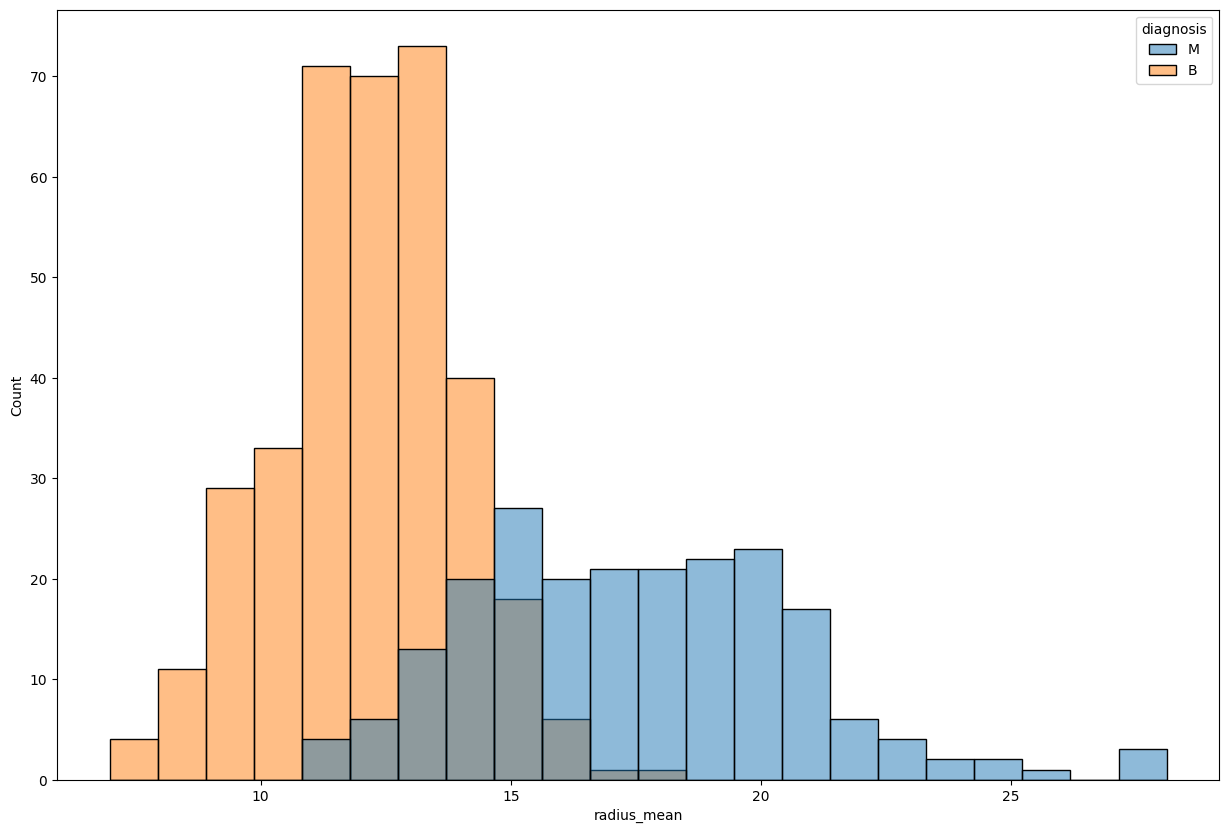

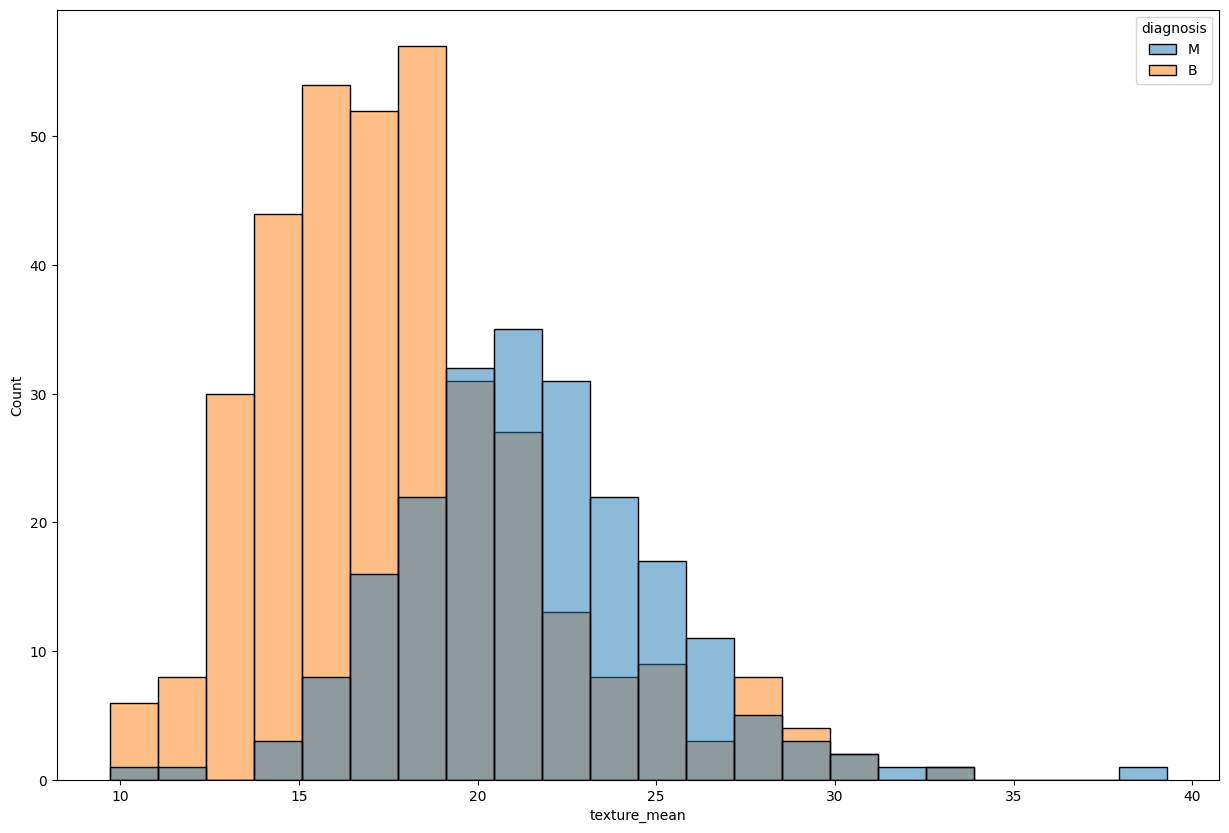

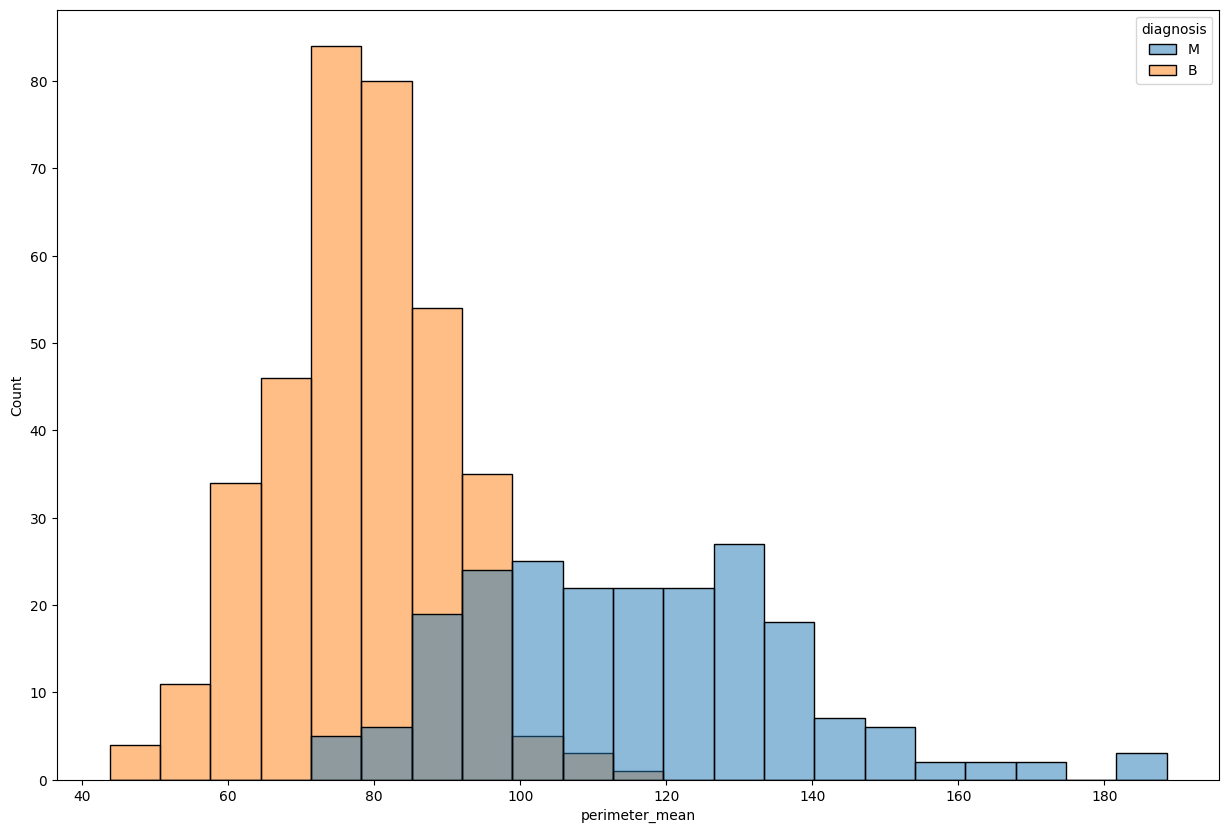

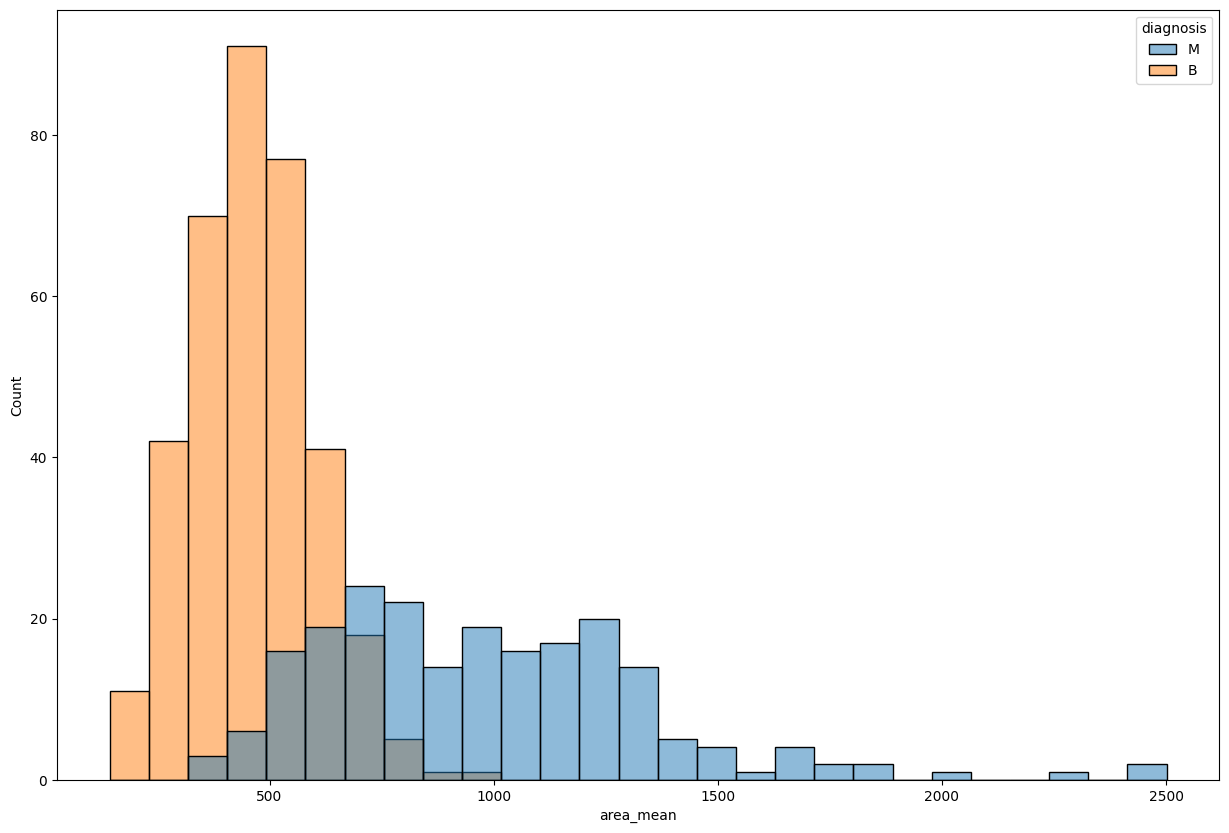

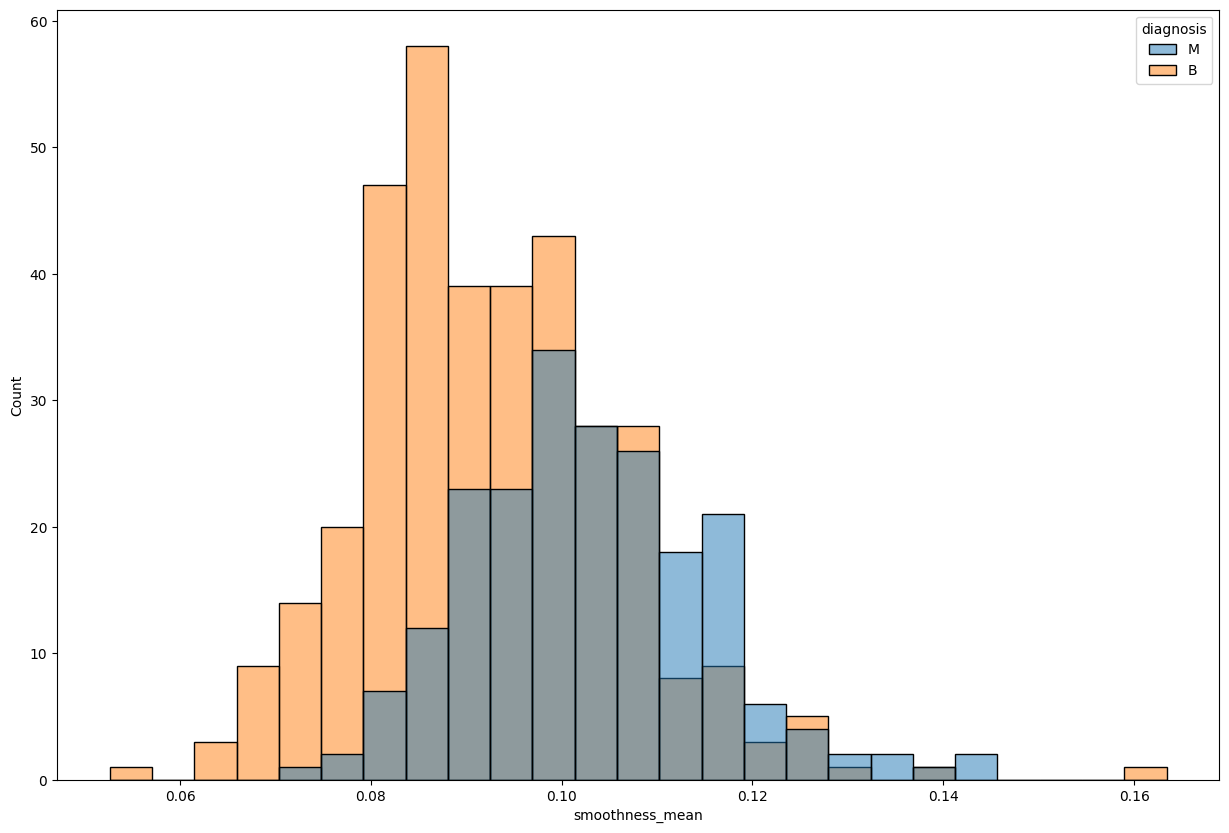

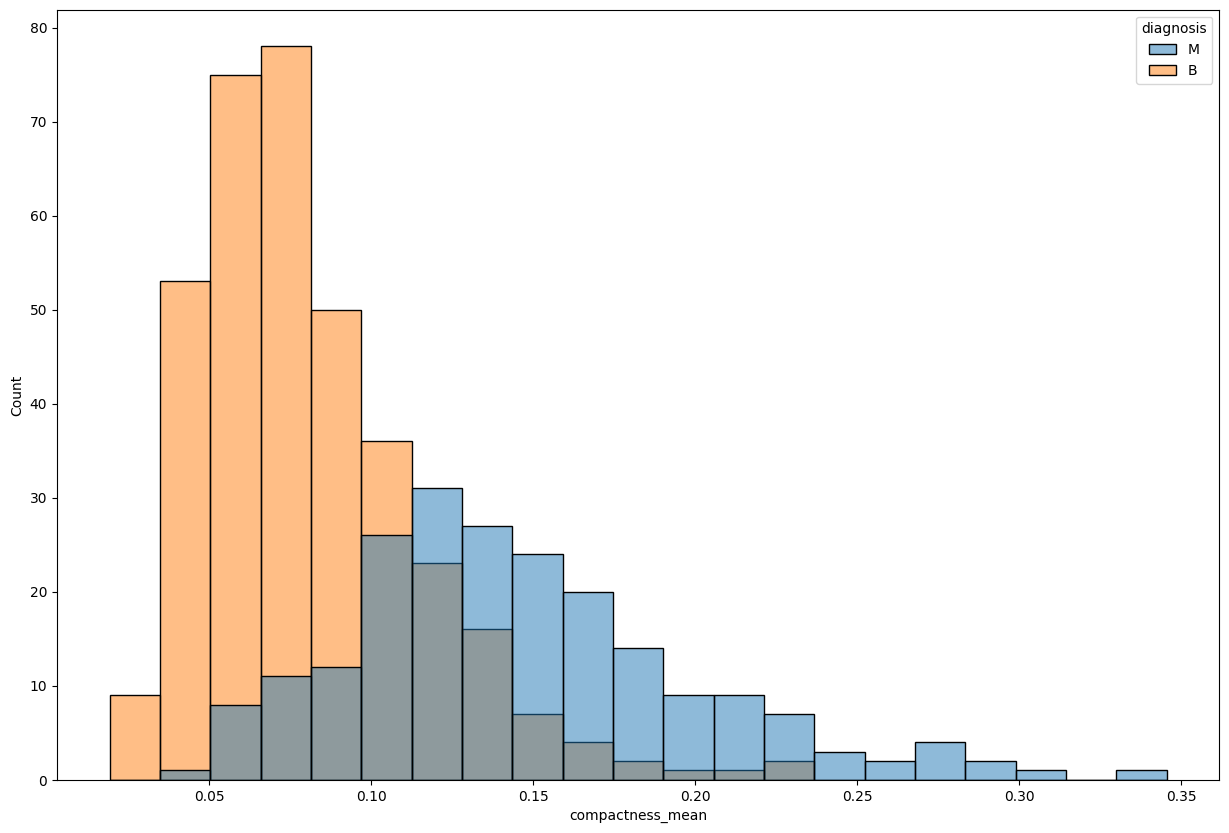

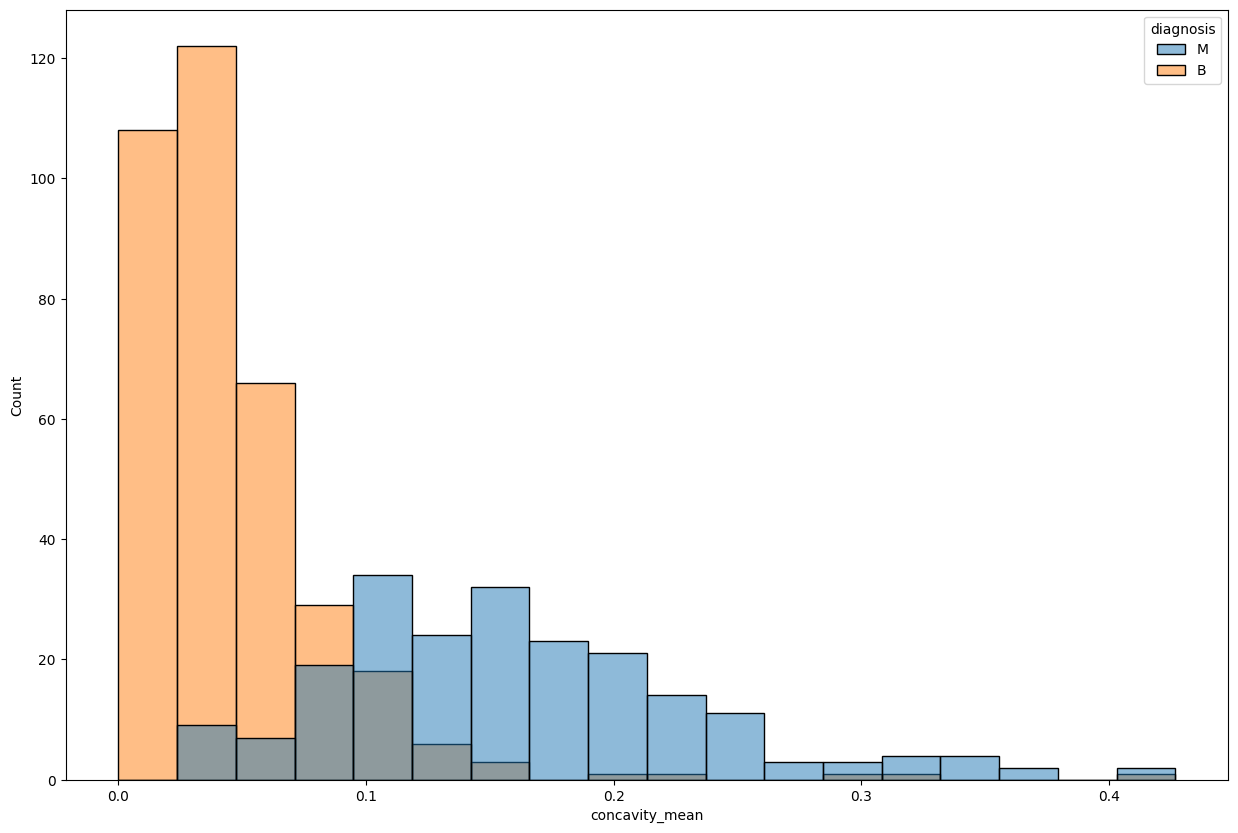

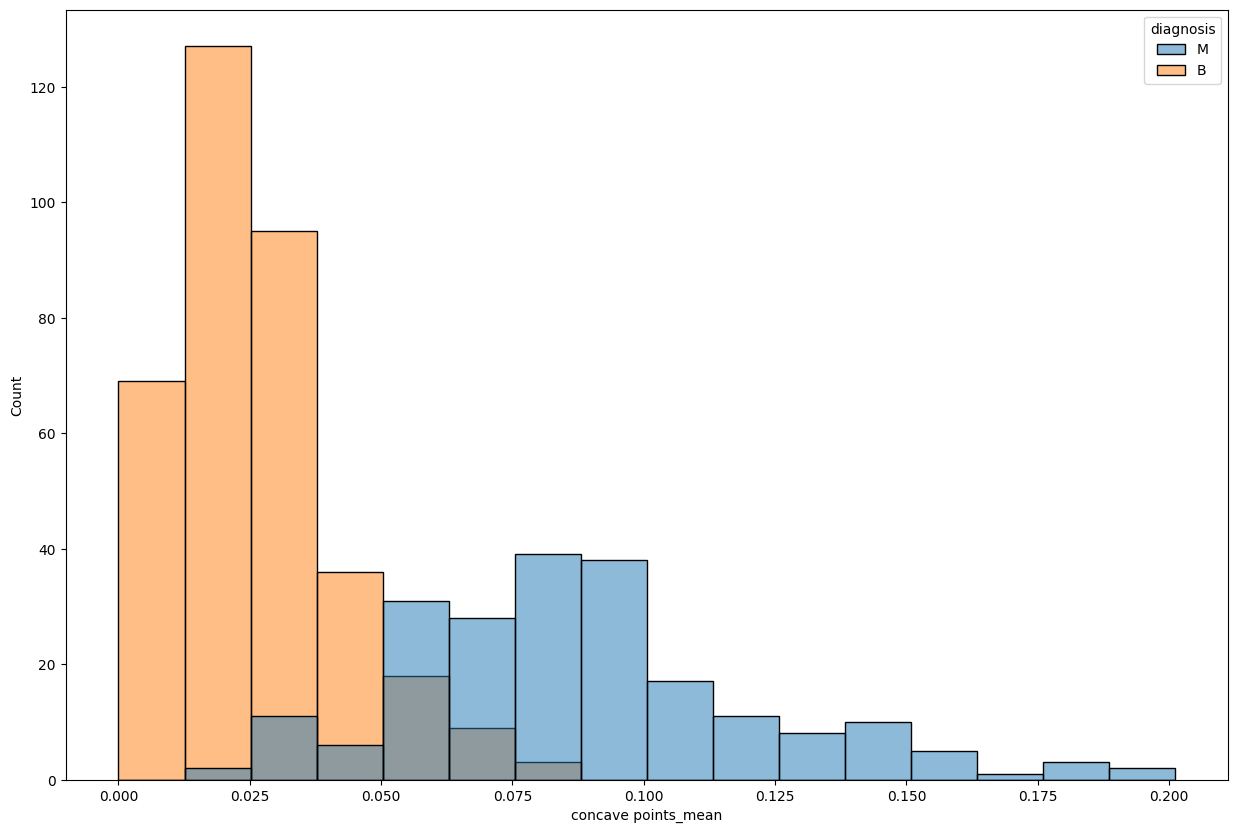

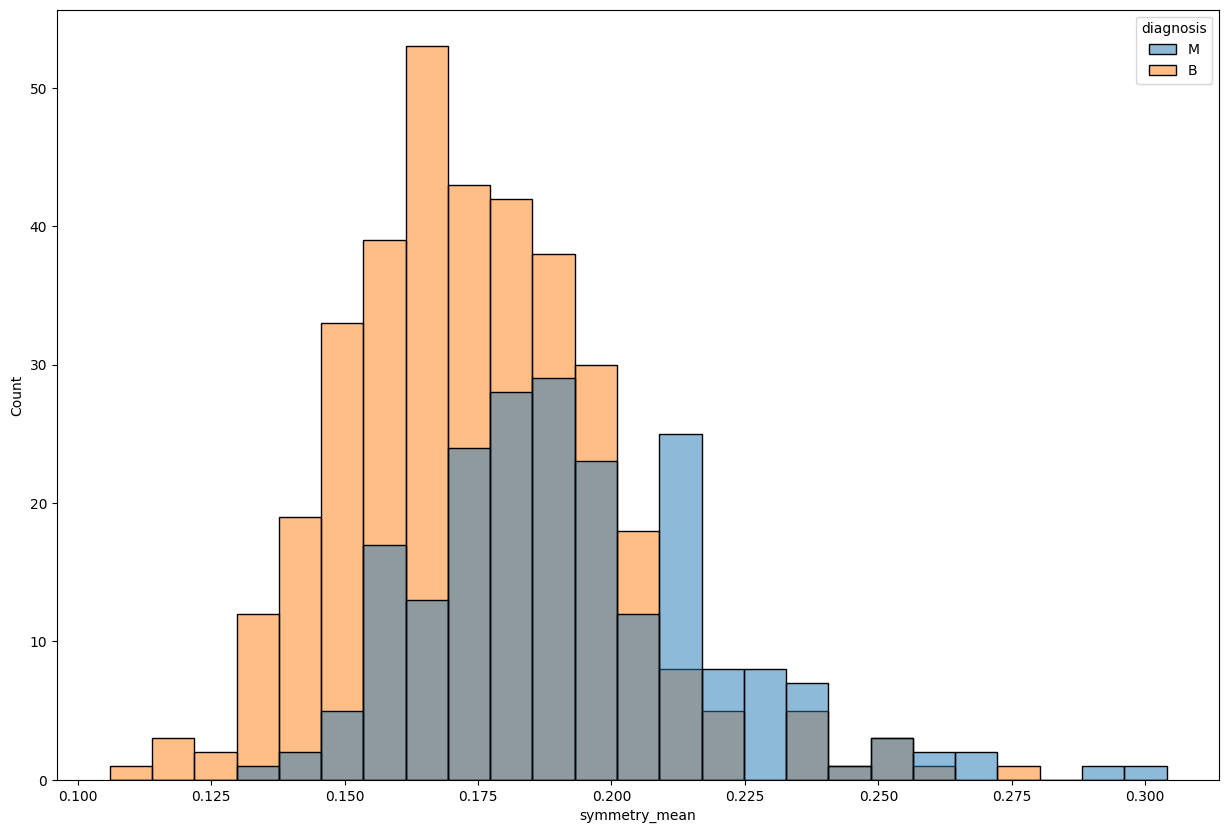

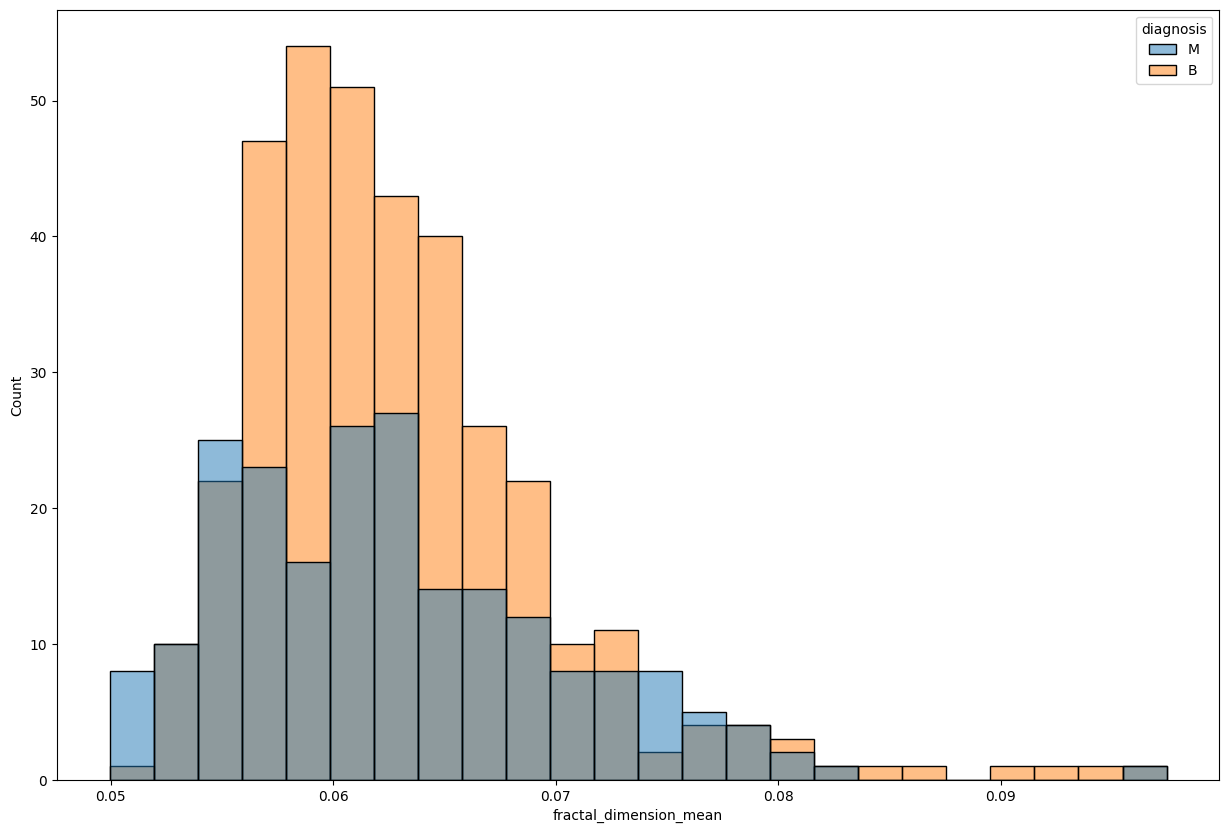

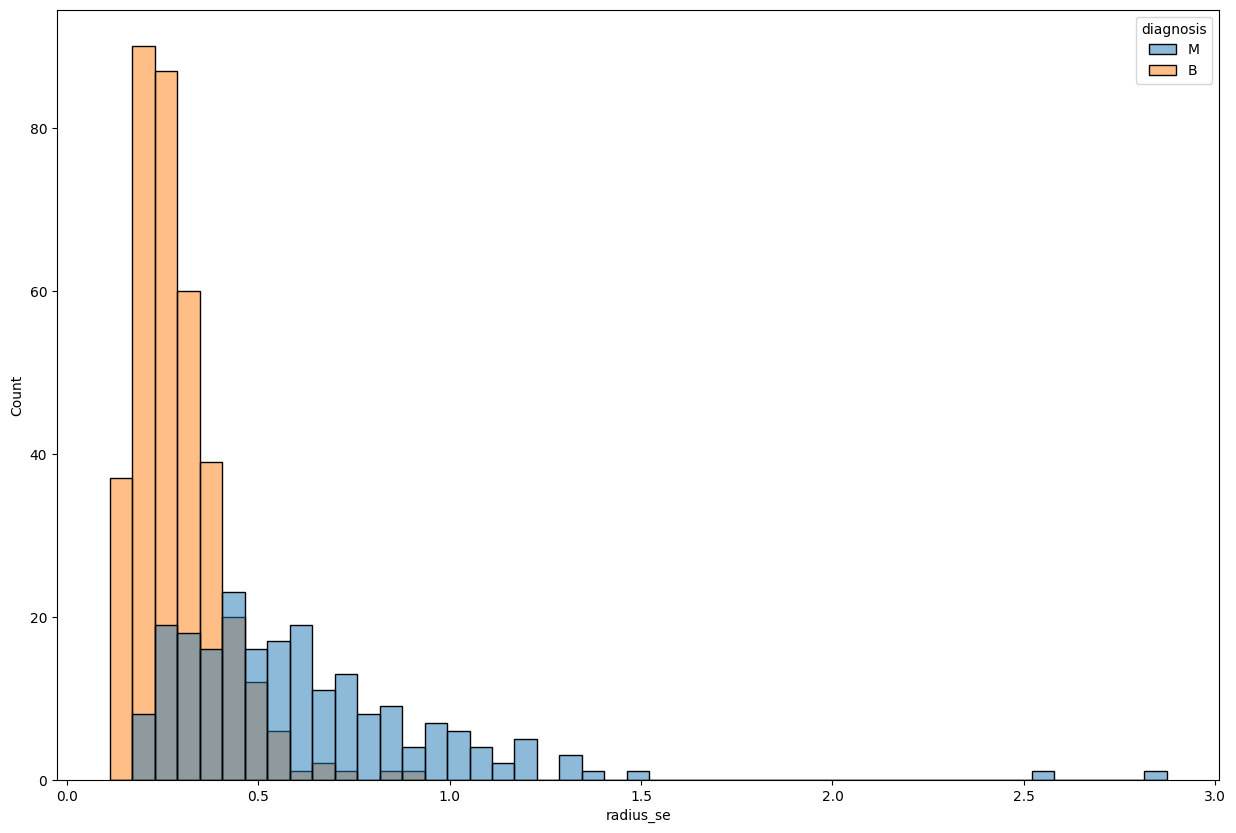

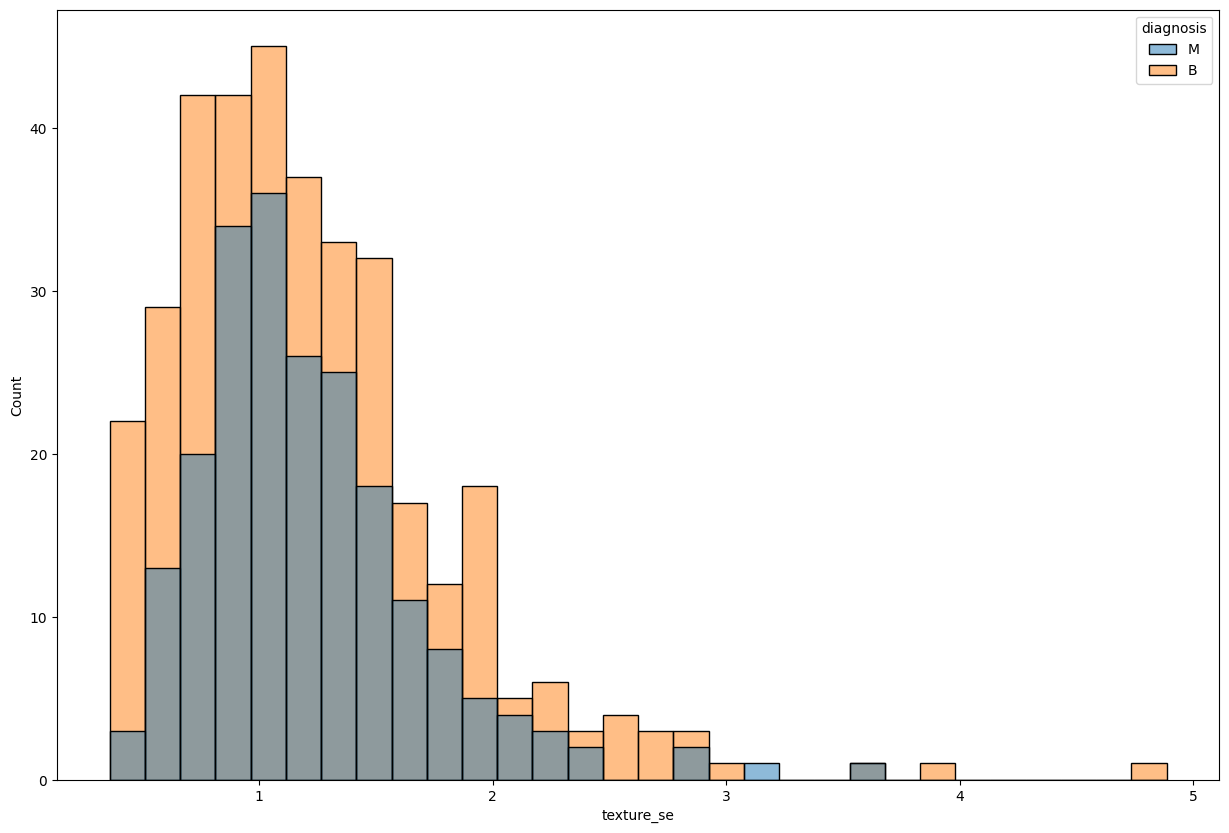

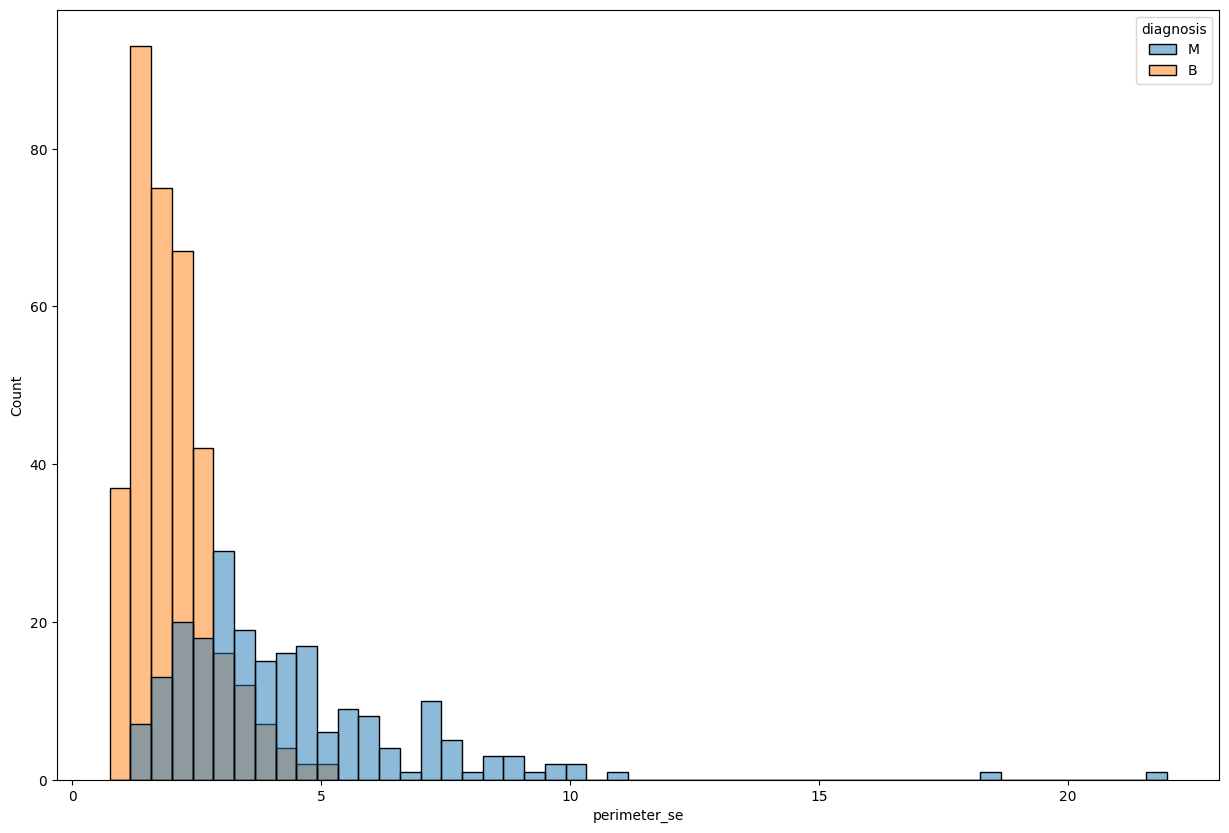

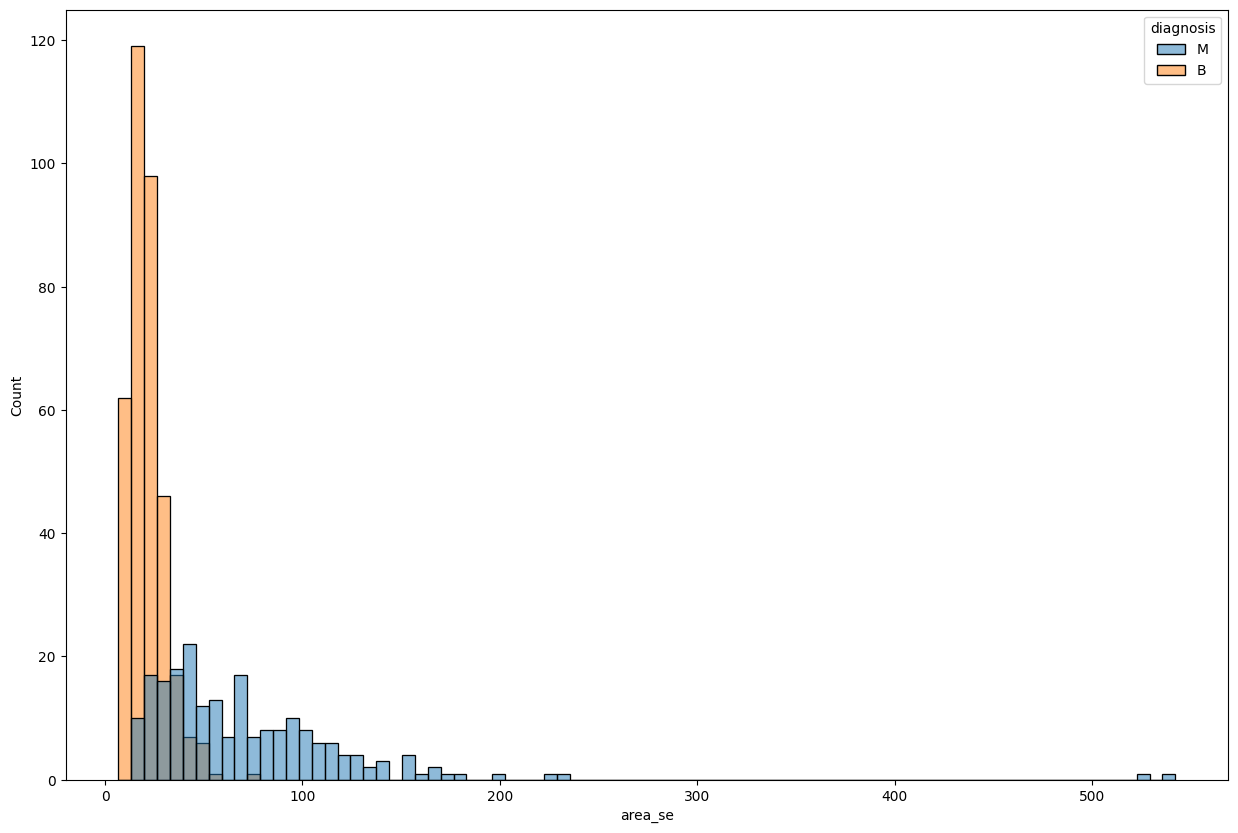

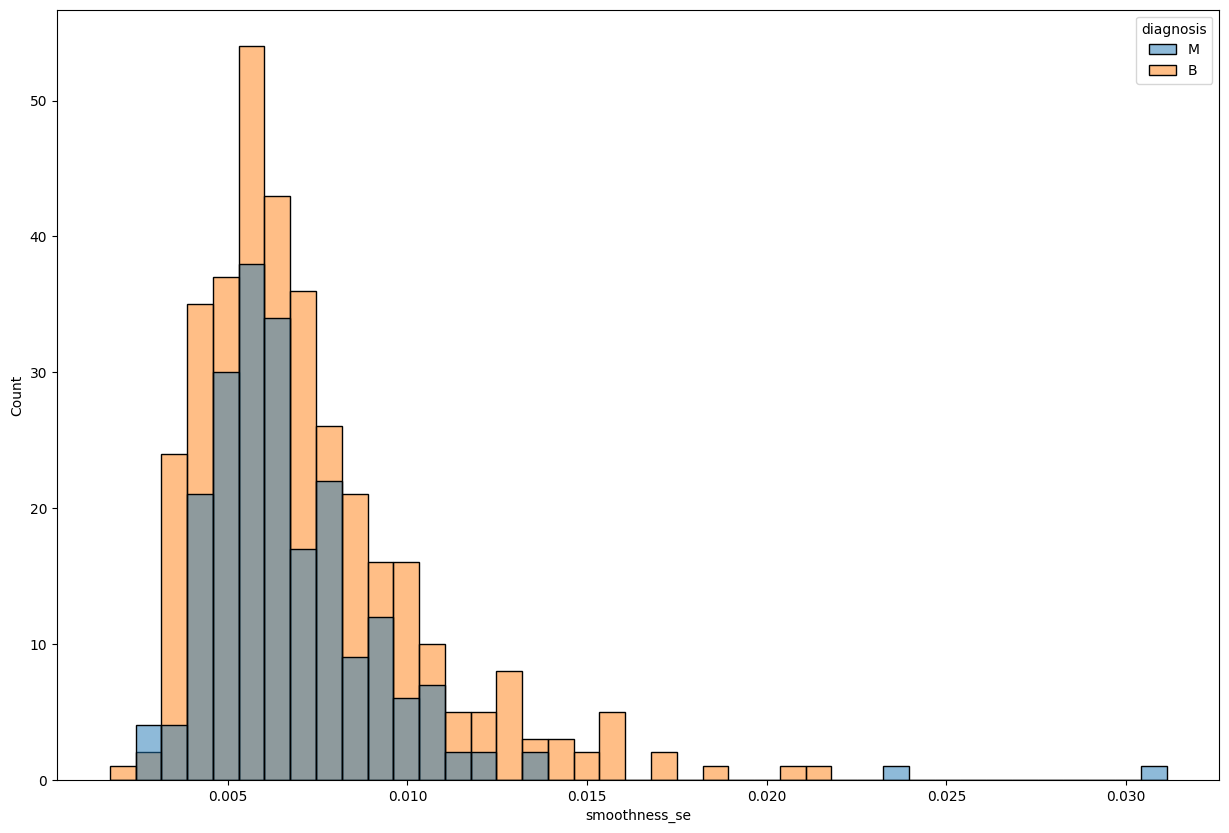

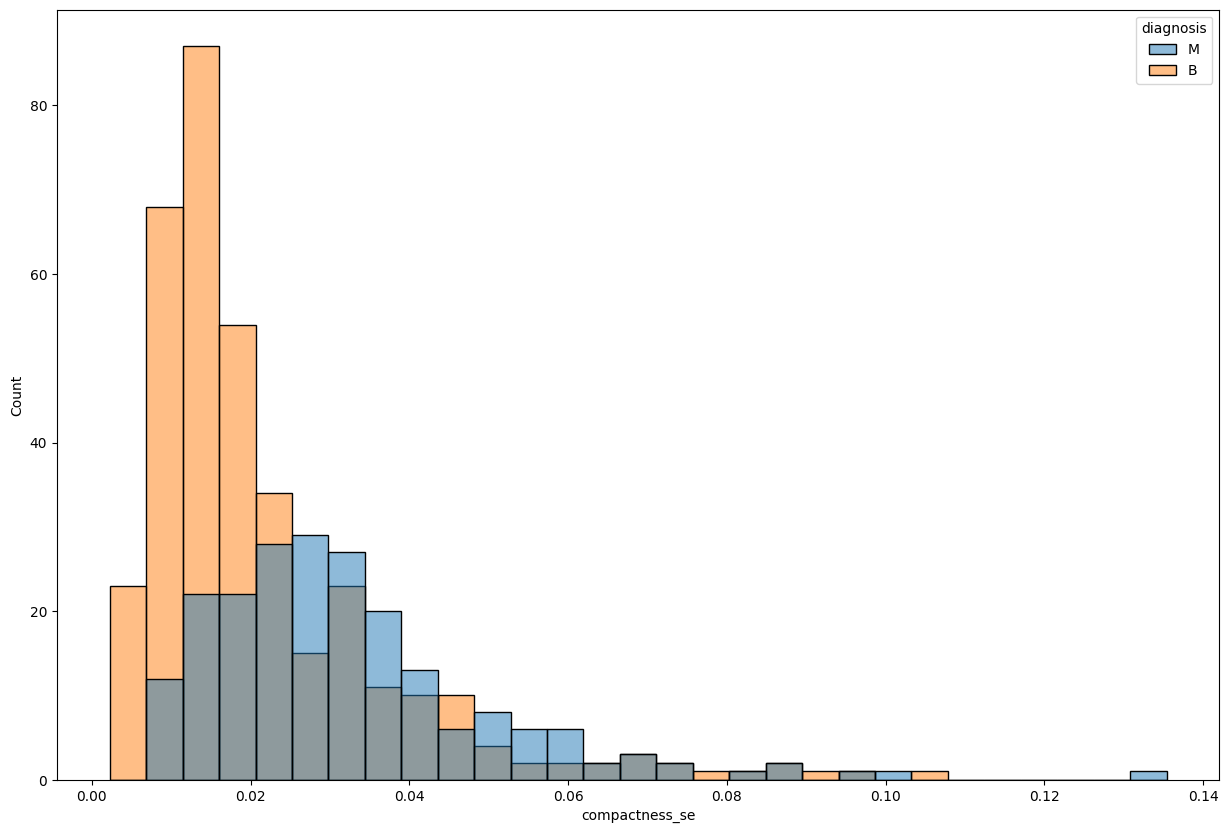

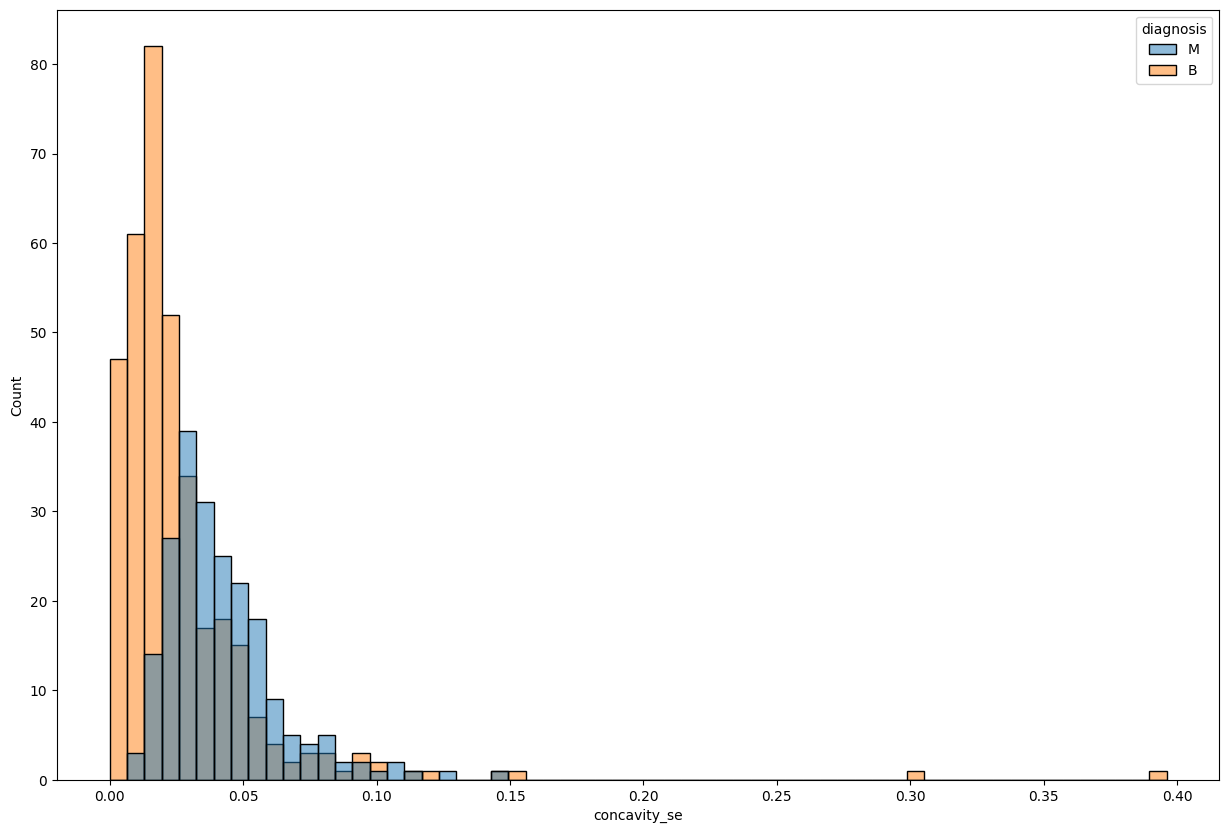

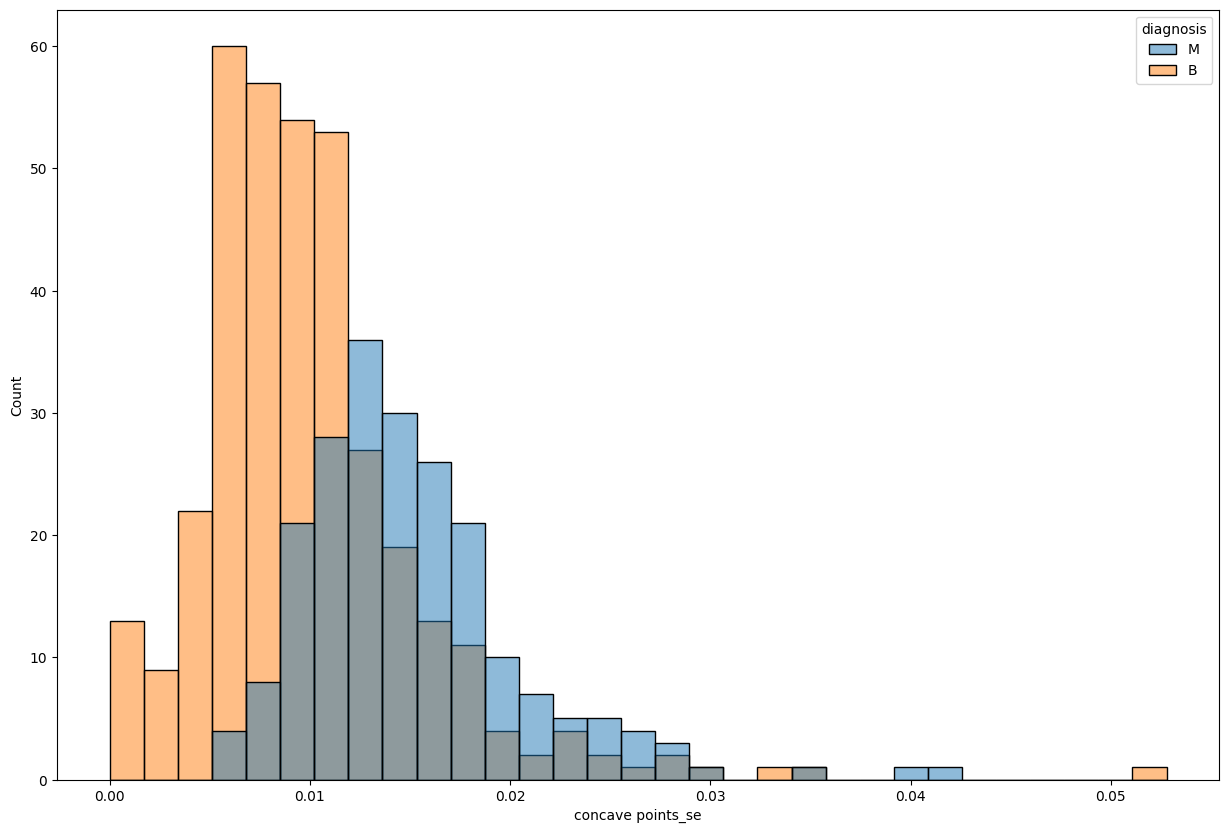

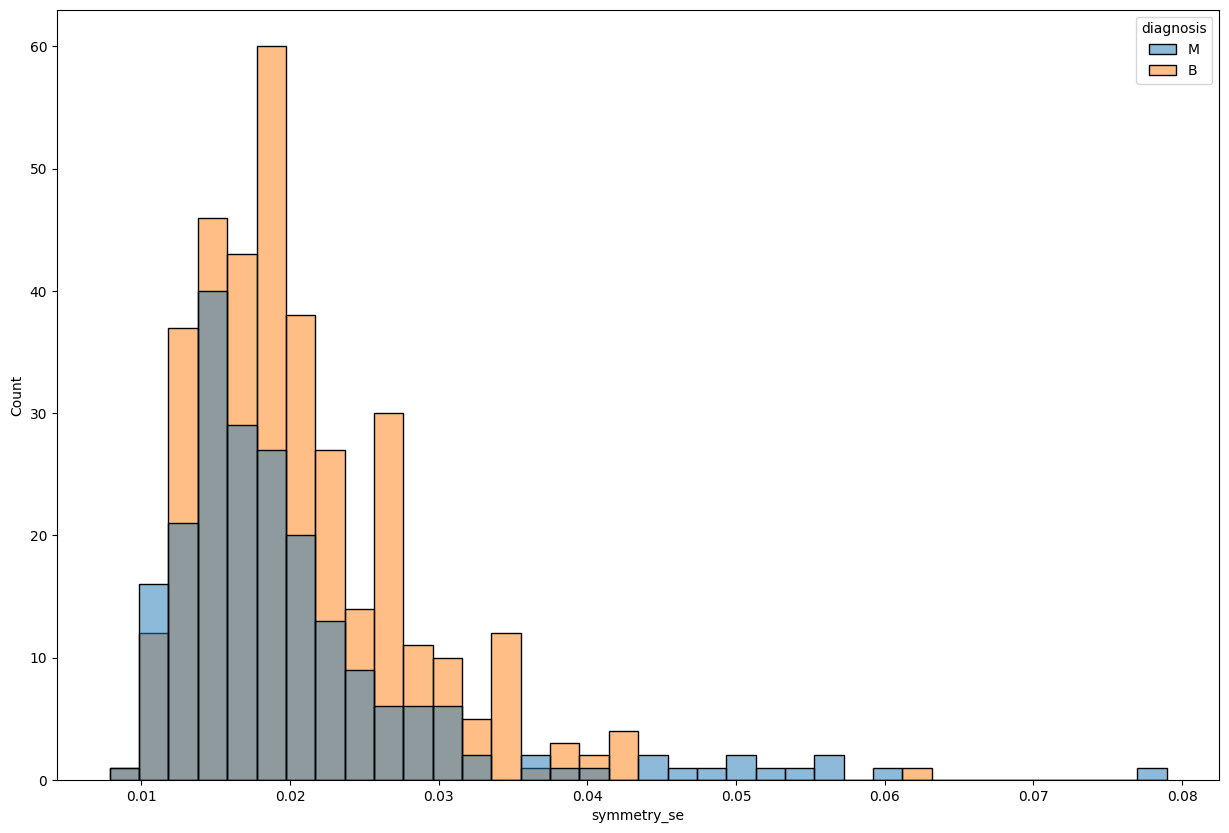

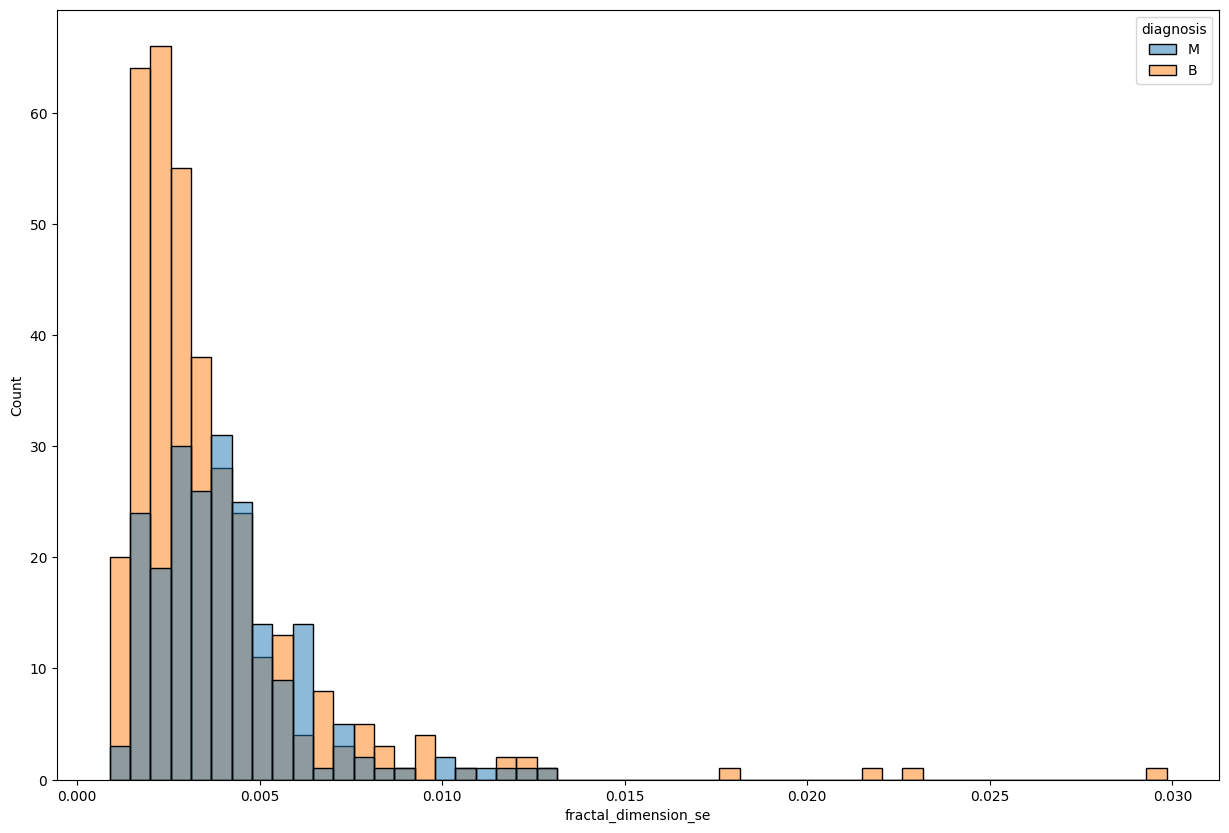

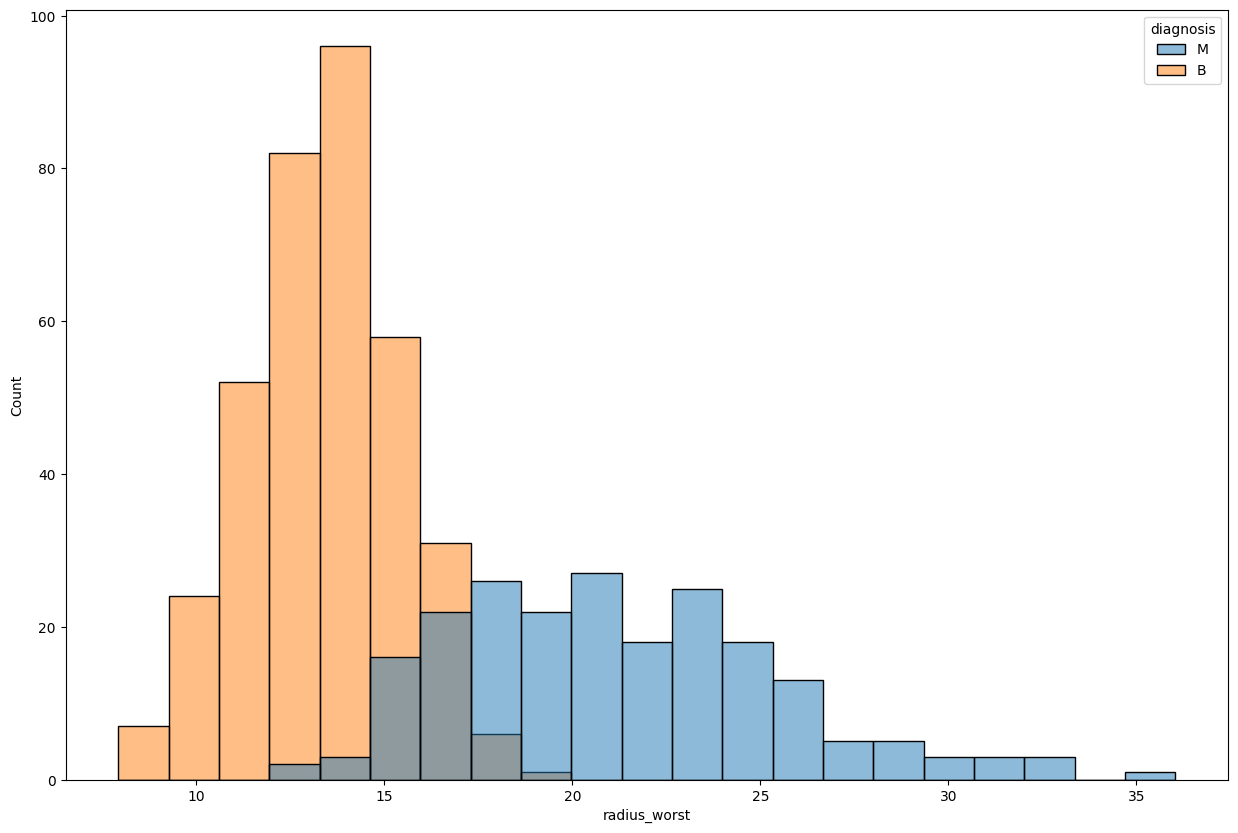

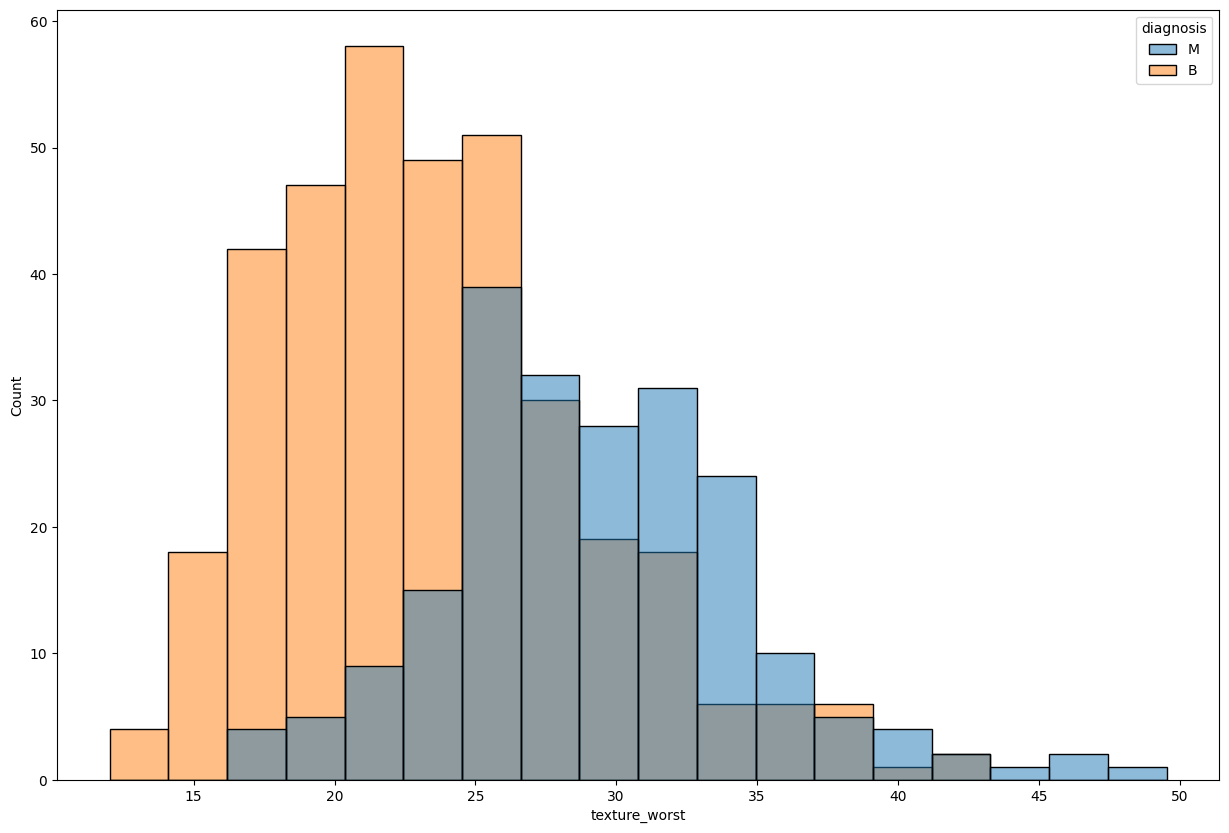

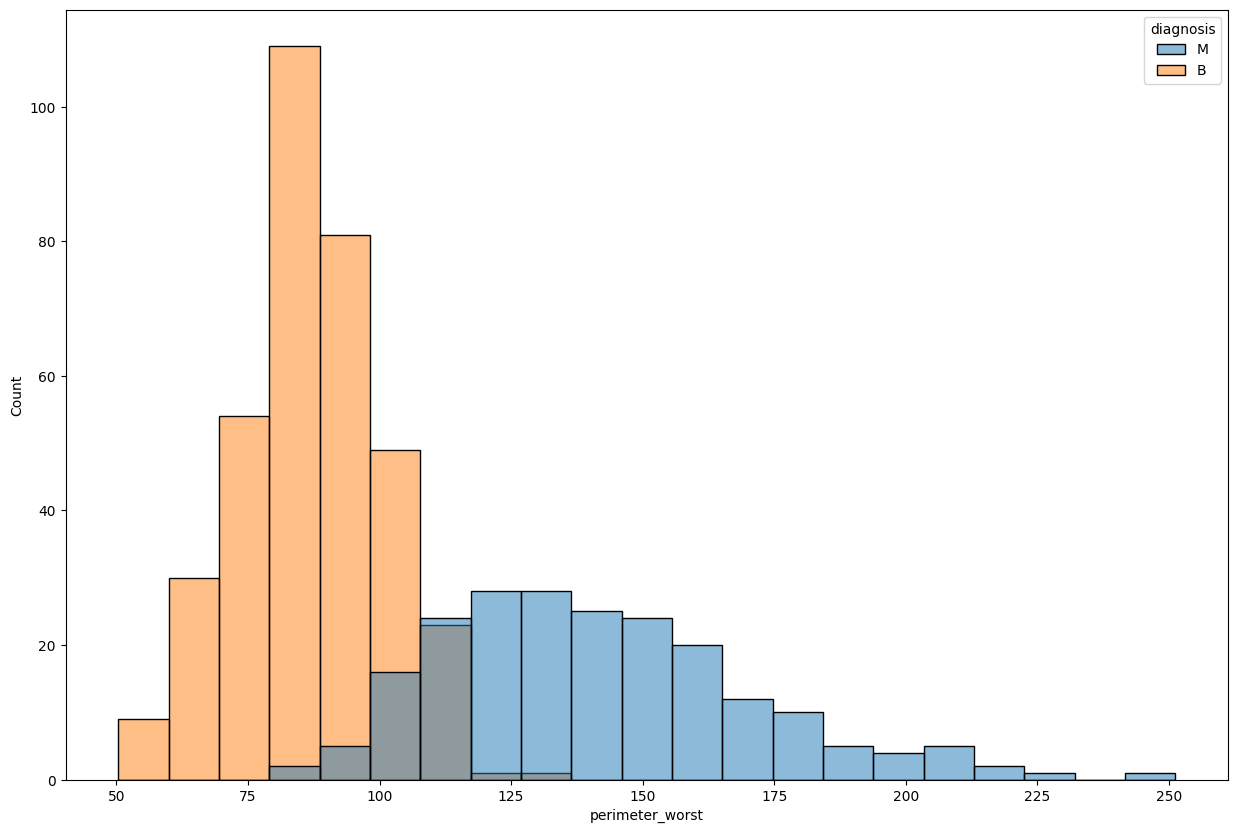

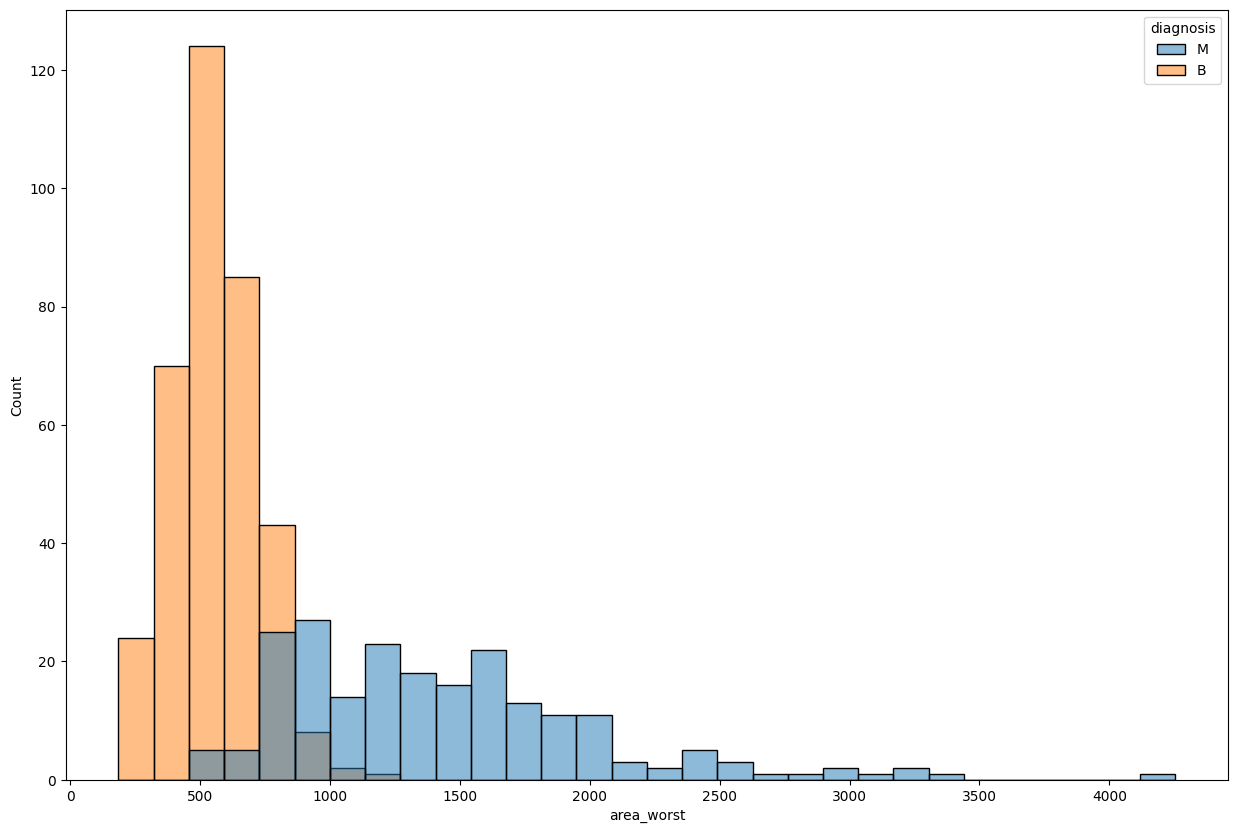

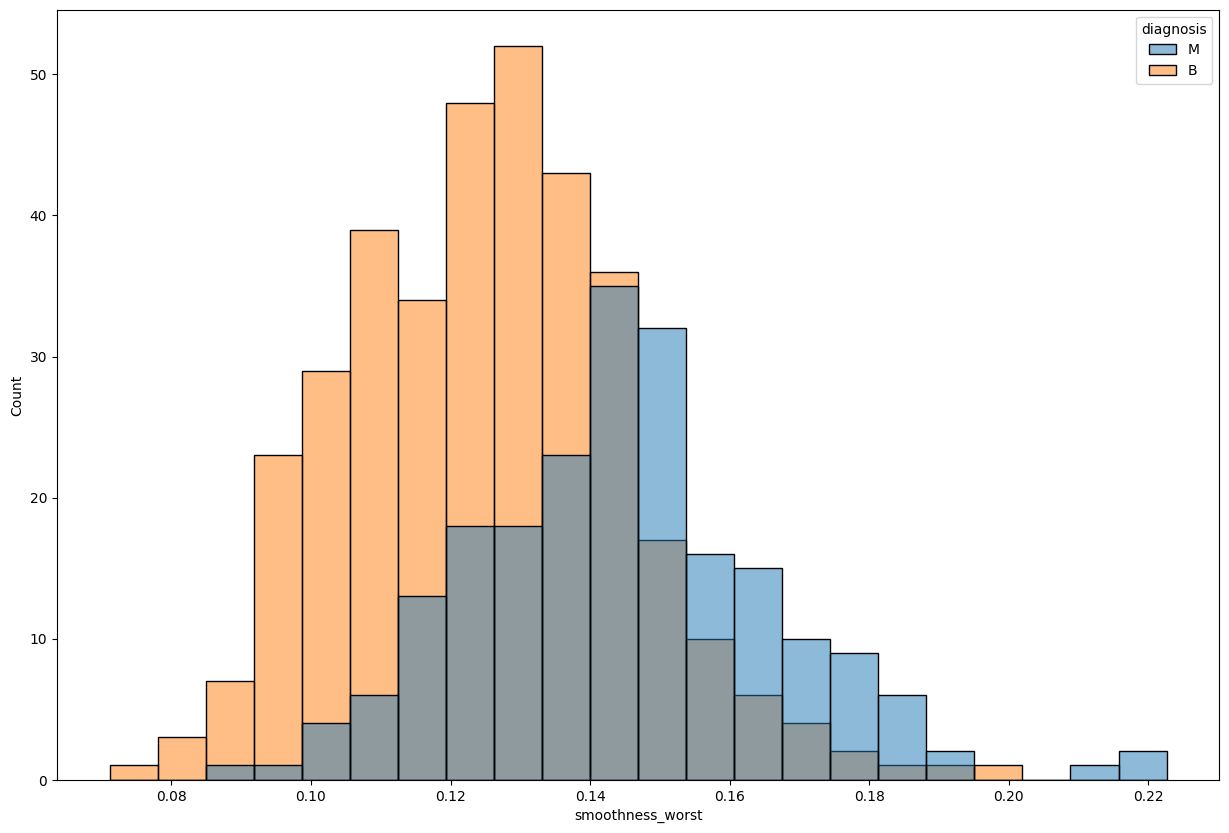

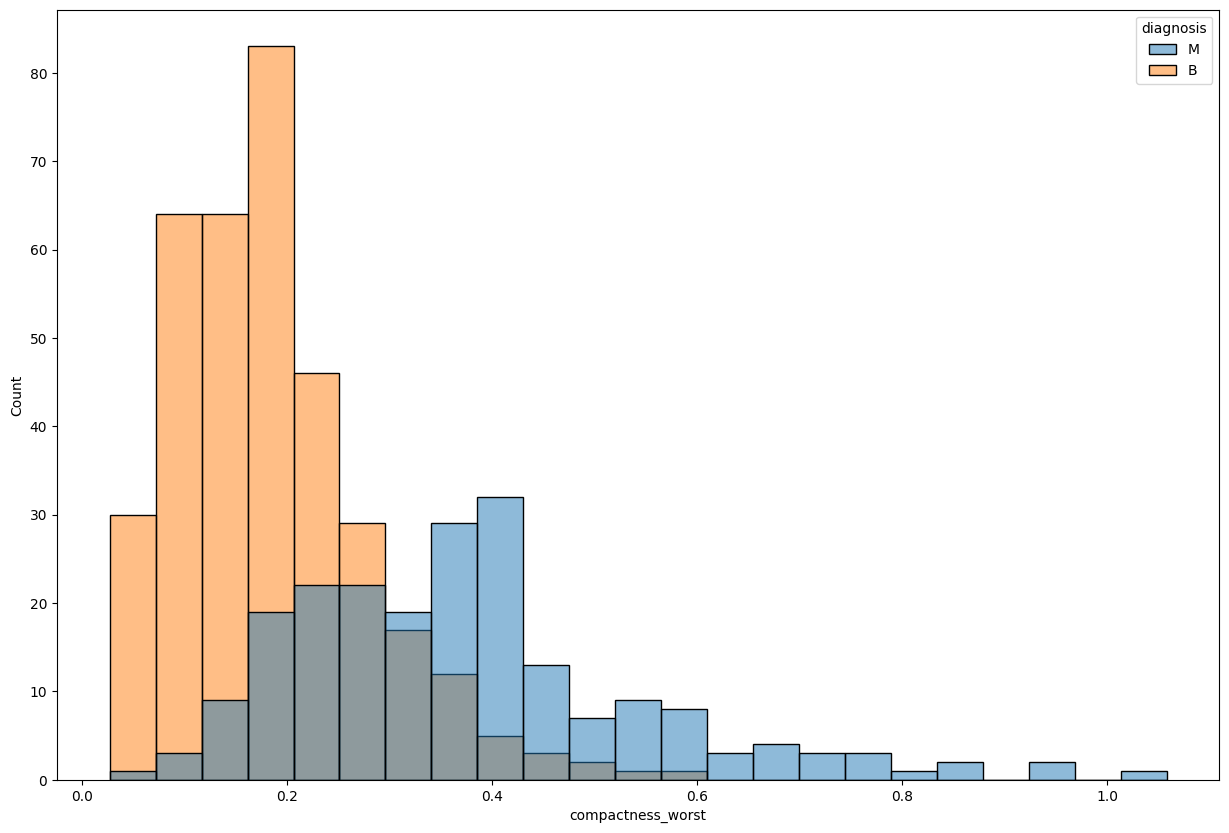

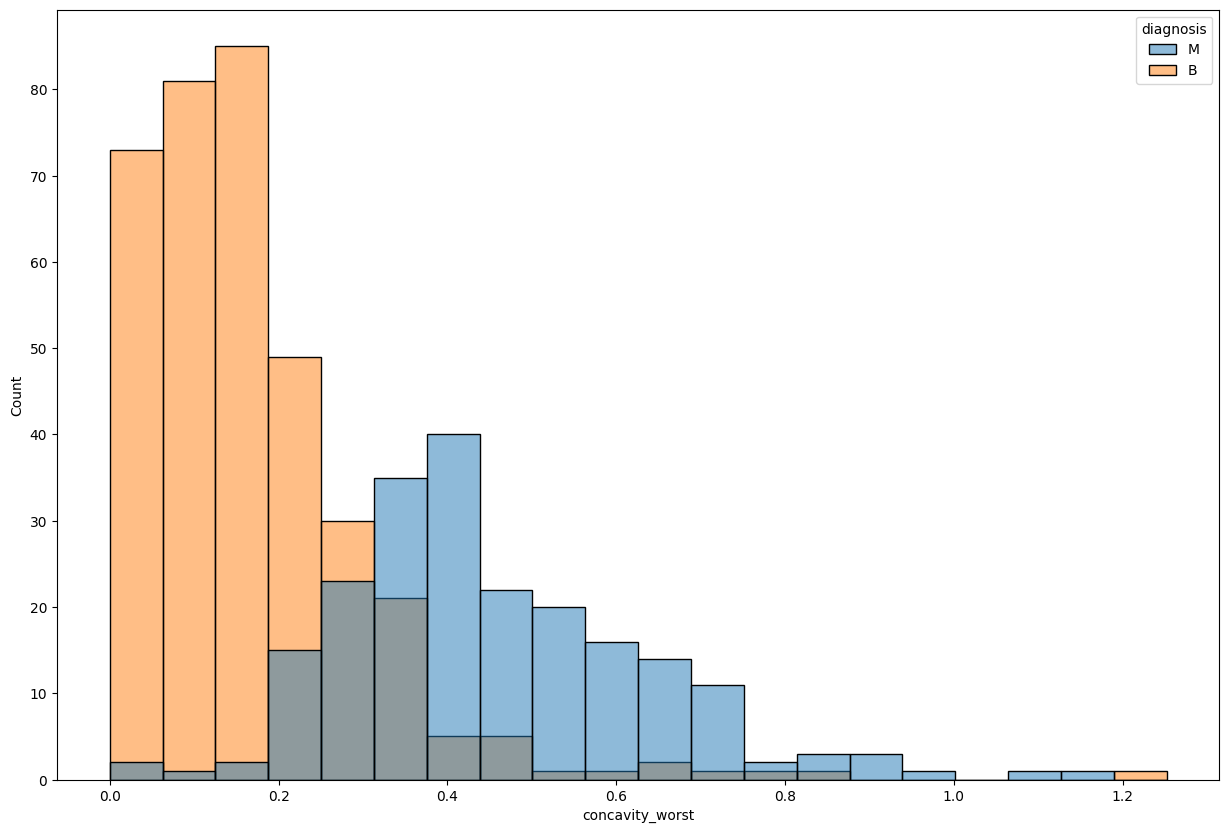

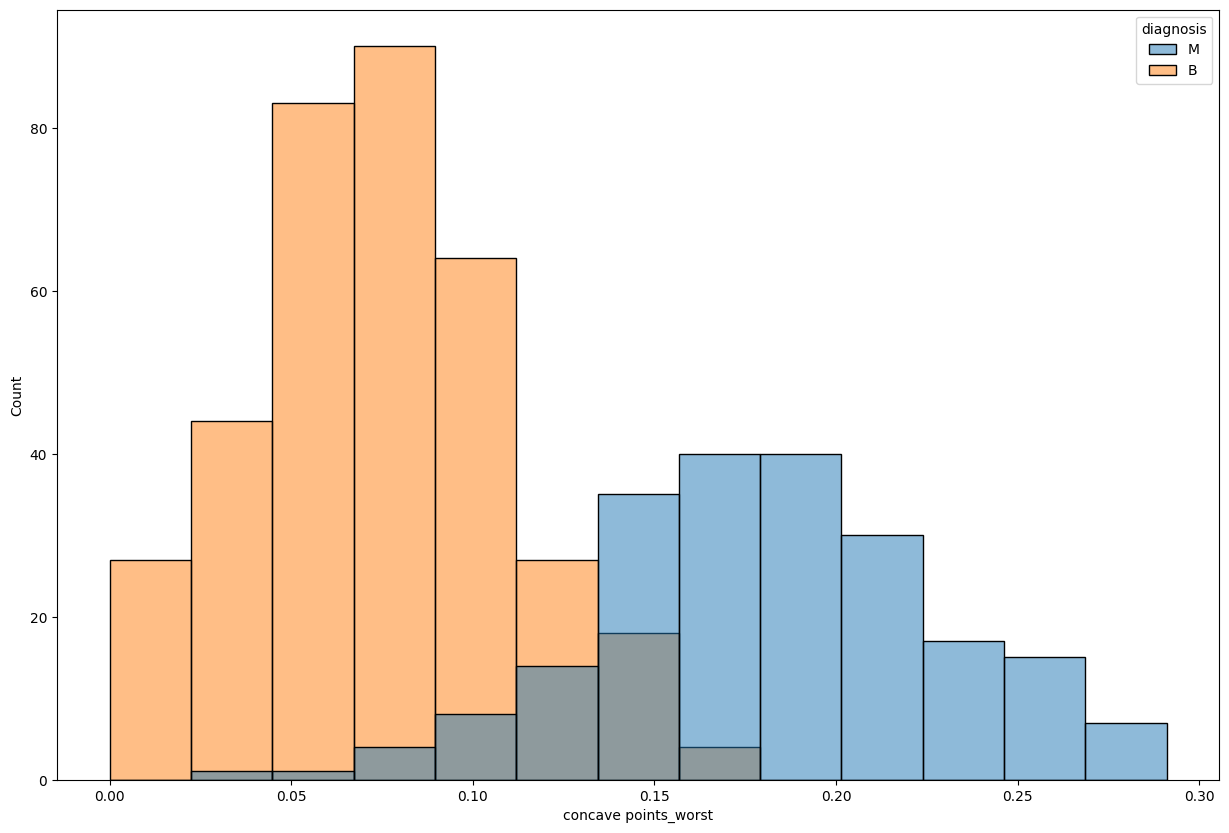

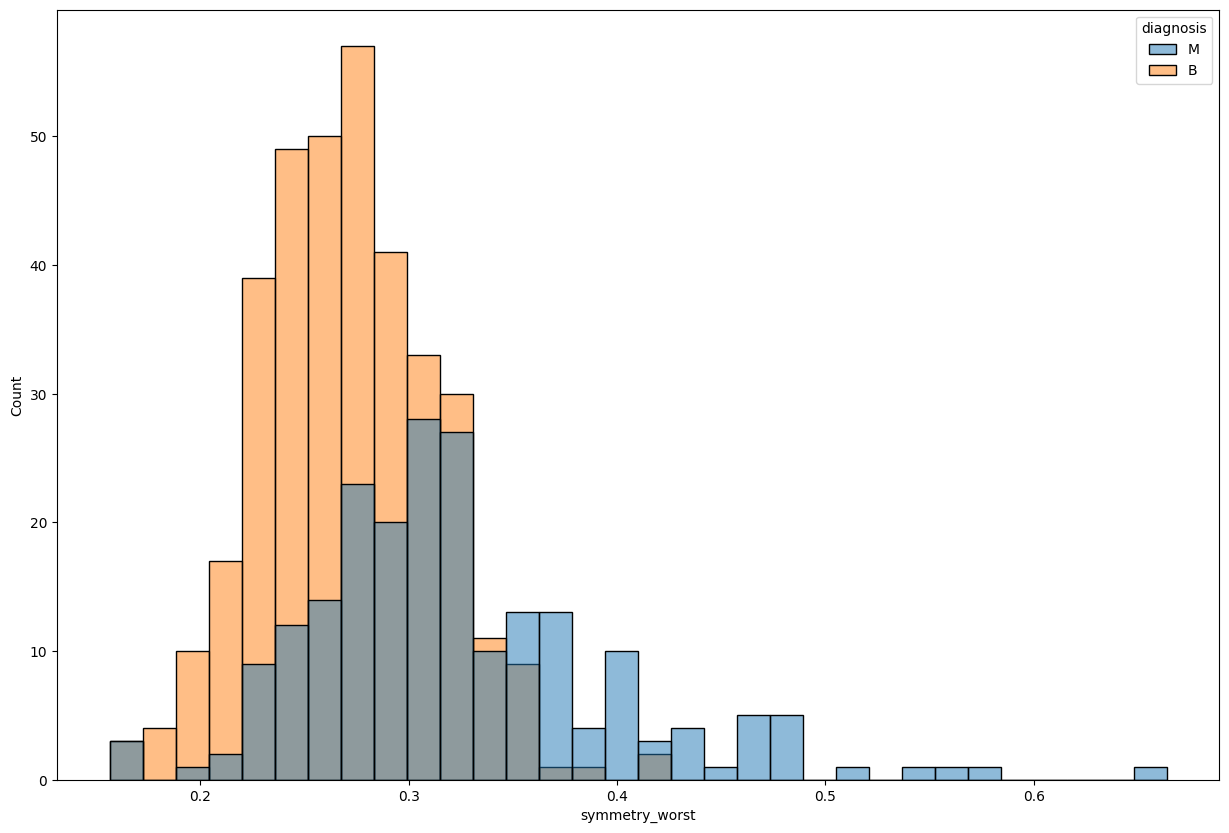

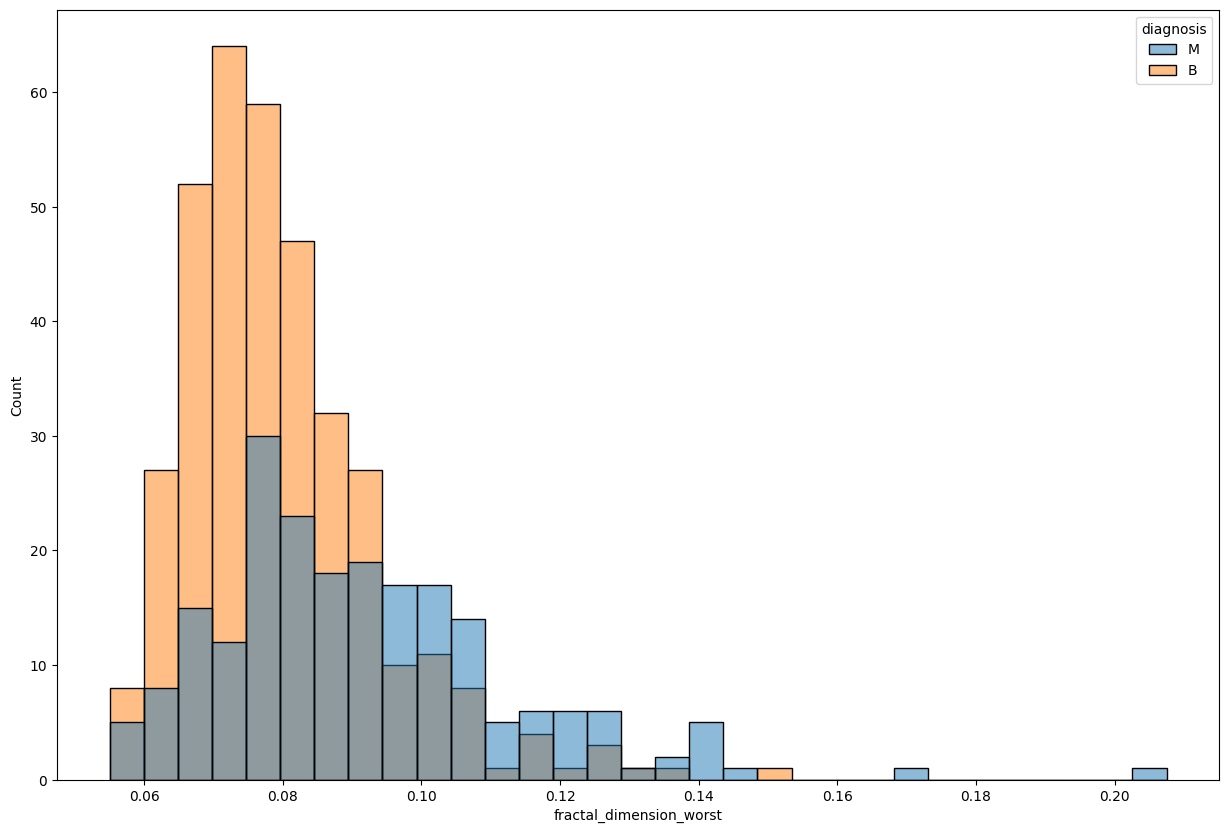

In [65]:
for i in features:
  plt.figure(figsize=(15,10))
  sns.histplot(data=df,x=i,hue='diagnosis',multiple='layer')
  plt.show()

In [66]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

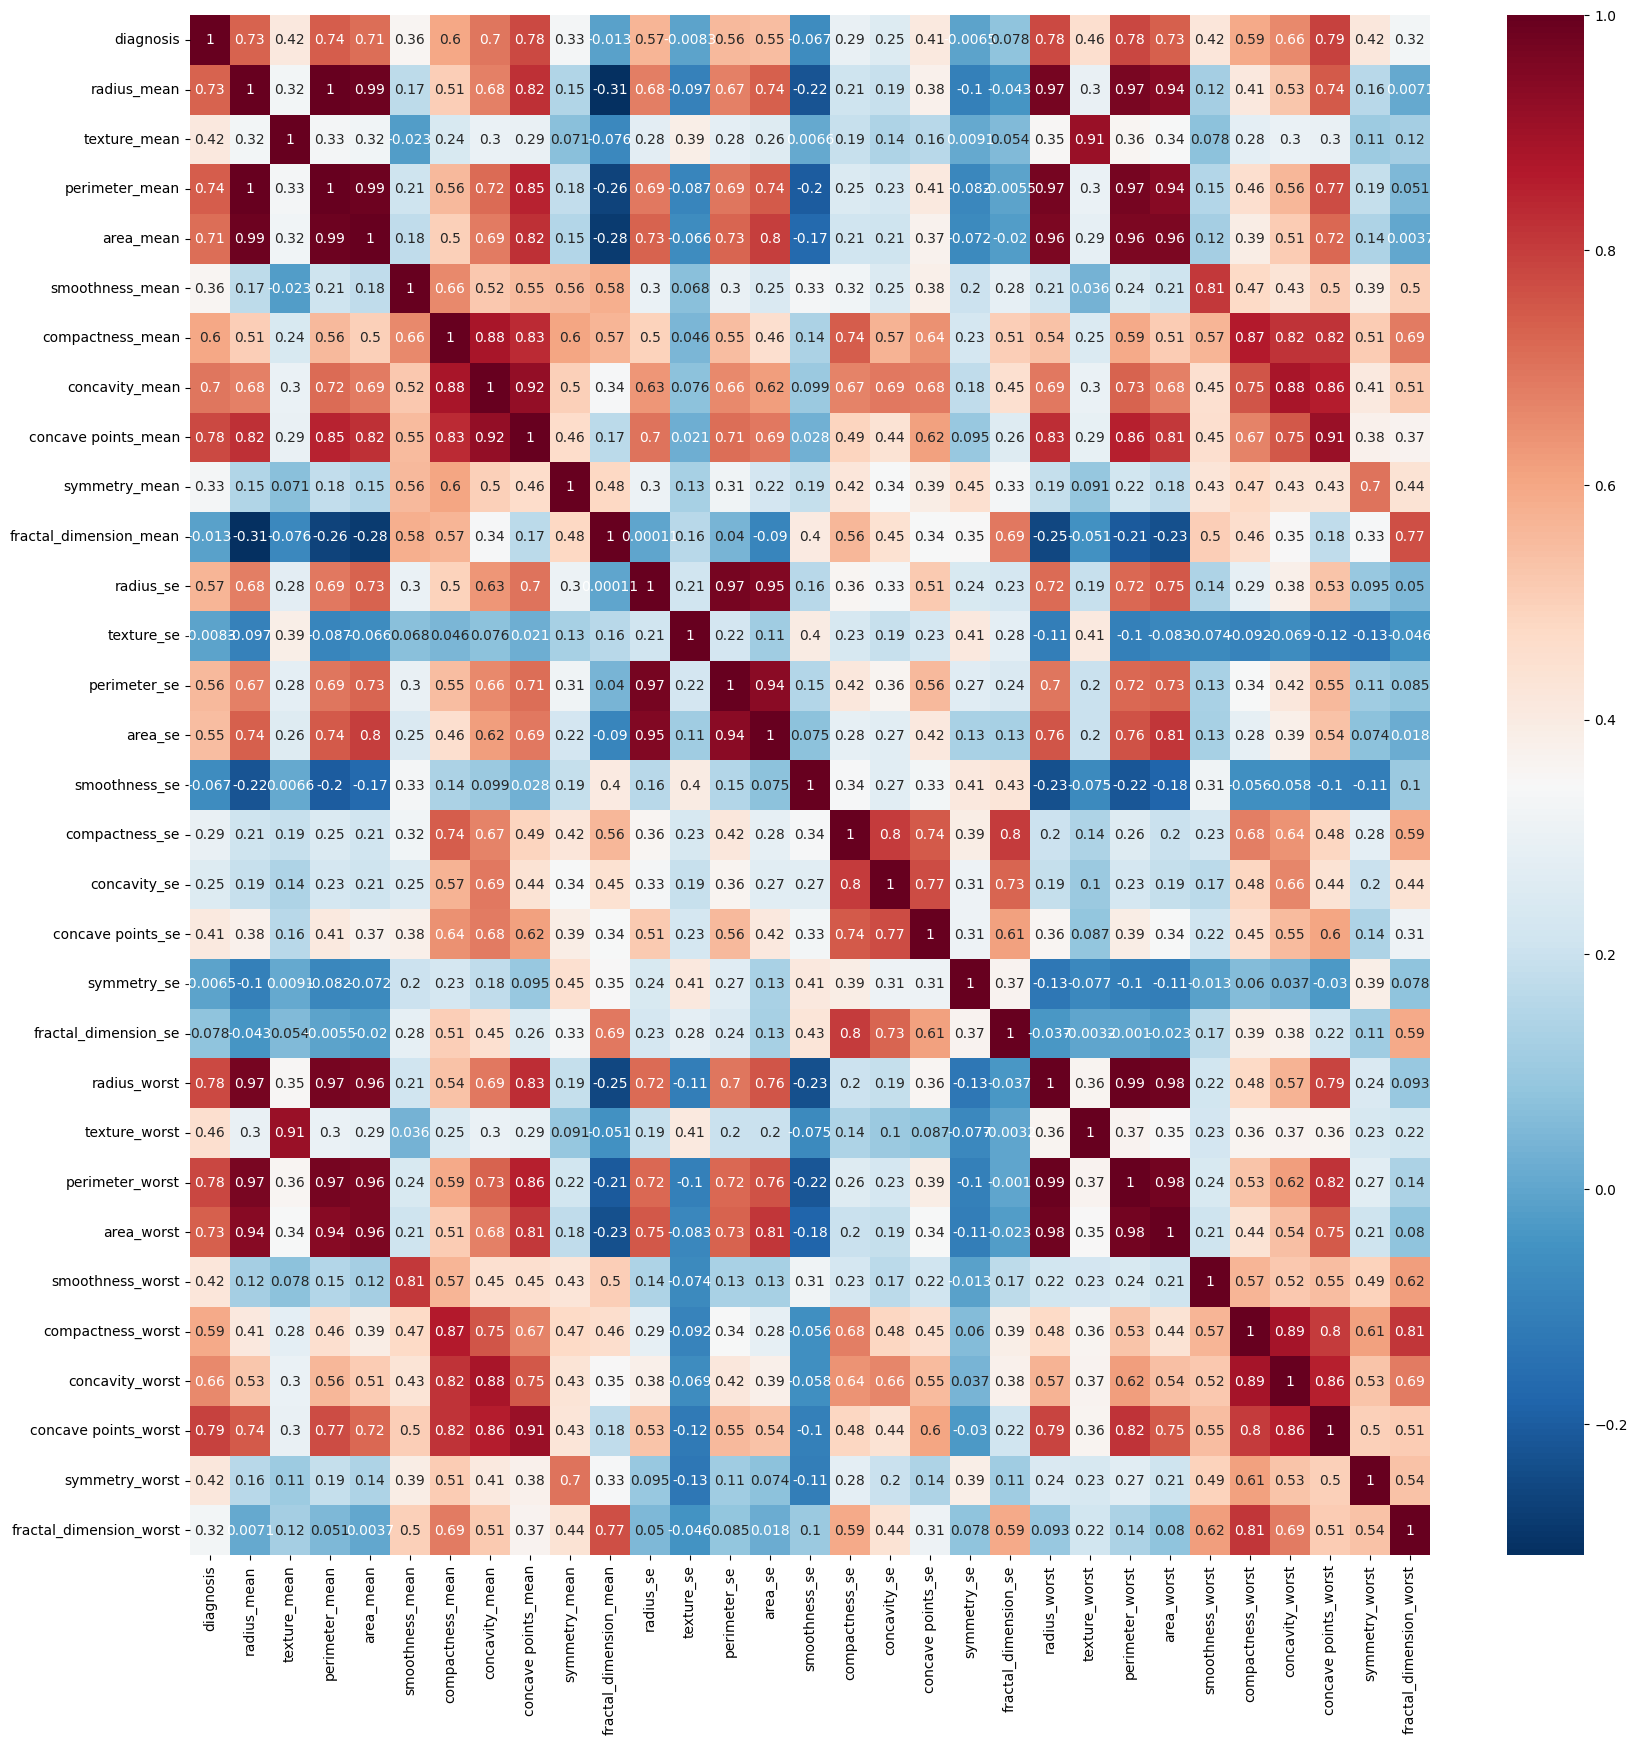

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='RdBu_r',annot=True)
plt.show()

3)CHECKING THE IMBALANCED DATASET

In [68]:
count=pd.DataFrame(df['diagnosis'].value_counts())
count

,diagnosis
0,357
1,212


In [69]:
count['%']=count['diagnosis']/sum(count['diagnosis'])
count

,diagnosis,%
0,357,0.627417
1,212,0.372583


Slightly Imbalanced Dataset

4)SPLITTING THE DATASET

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21,stratify=Y)
print(X_train.shape)
print(X_test.shape)


(426, 30)
(143, 30)


In [73]:
!pip install imblearn
import imblearn

In [74]:
from imblearn.combine import SMOTEENN
#balance=SMOTEENN(random_state=21)
#X_train,Y_train=balance.fit_resample(X_train,Y_train)
X_train.shape

(426, 30)

In [75]:
Y_test.shape

(143,)

In [76]:
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
Y_test=Y_test.values


5)SCALING

In [77]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)

6) BUILD the MODEL

In [78]:
def model(MODEL,X,Y):
  MOD=MODEL
  MOD.fit(X,Y)
  return MOD

In [79]:
# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
LOG=model(LogisticRegression(random_state=21),X_train_scale,Y_train)

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def n_fold(mod,X,Y):
  res_train=round(roc_auc_score(Y,mod.predict(X)),3)
  res_test=round(np.mean(cross_val_score(mod,X,Y,cv=10,scoring='roc_auc')),3)
  return res_train,res_test


In [81]:
hyper_tuning=pd.DataFrame(columns=['K','train_score','val_score'])
for i in range(1,10):
   Knn=model(KNeighborsClassifier(i),X_train_scale,Y_train)
   res_train,res_test=n_fold(Knn,X_train_scale,Y_train)
   result={'K':i,'train_score':res_train,'val_score':res_test}
   hyper_tuning.loc[len(hyper_tuning)]=result
hyper_tuning


,K,train_score,val_score
0,1,1.000,0.947
1,2,0.962,0.973
2,3,0.979,0.977
3,4,0.972,0.976
4,5,0.976,0.980
5,6,0.967,0.980
6,7,0.967,0.982
7,8,0.969,0.985
8,9,0.971,0.985


In [82]:
hyp=hyper_tuning.sort_values(by=['val_score','val_score'], ascending=False)
hyp.head(1)

,K,train_score,val_score
7,8,0.969,0.985


In [83]:
Knn=model(KNeighborsClassifier(8),X_train_scale,Y_train)

iii) Decision Tree Classifier

In [84]:
hyper_tuning=pd.DataFrame(columns=['max_depth','train_score','val_score'])
for i in range(1,10):
   Dt=model(DecisionTreeClassifier(max_depth=i,random_state=21),X_train_scale,Y_train)
   res_train,res_test=n_fold(Dt,X_train_scale,Y_train)
   result={'max_depth':i,'train_score':res_train,'val_score':res_test}
   hyper_tuning.loc[len(hyper_tuning)]=result
hyper_tuning


,max_depth,train_score,val_score
0,1,0.901,0.862
1,2,0.950,0.917
2,3,0.957,0.897
3,4,0.981,0.883
4,5,0.984,0.894
5,6,0.989,0.913
6,7,0.997,0.921
7,8,1.000,0.934
8,9,1.000,0.931


In [85]:
hyp=hyper_tuning.sort_values(by=['val_score','val_score'], ascending=False)
hyp.head(1)

,max_depth,train_score,val_score
7,8,1.0,0.934


In [86]:
Dt=model(DecisionTreeClassifier(max_depth=8,random_state=21),X_train_scale,Y_train)

(IV) RANDOM FOREST CLASSIFIER

In [87]:
hyper_tuning=pd.DataFrame(columns=['n_estimator','train_score','val_score'])
for i in range(1,100,10):
   Rfc=model(RandomForestClassifier(n_estimators=i,max_depth=5,max_features='sqrt',random_state=21),X_train_scale,Y_train)
   res_train,res_test=n_fold(Rfc,X_train_scale,Y_train)
   result={'n_estimator':i,'train_score':res_train,'val_score':res_test}
   hyper_tuning.loc[len(hyper_tuning)]=result
hyper_tuning


,n_estimator,train_score,val_score
0,1,0.972,0.930
1,11,0.987,0.986
2,21,0.991,0.984
3,31,0.991,0.990
4,41,0.991,0.989
5,51,0.987,0.988
6,61,0.991,0.987
7,71,0.991,0.987
8,81,0.991,0.987
9,91,0.991,0.987


In [88]:
hyp=hyper_tuning.sort_values(by=['val_score','val_score'], ascending=False)
hyp.head(1)

,n_estimator,train_score,val_score
3,31,0.991,0.99


In [89]:
Rfc=model(RandomForestClassifier(n_estimators=11,max_depth=5,max_features='sqrt',random_state=21),X_train_scale,Y_train)

(V)XGBoost Classifier

In [90]:

hyper_tuning=pd.DataFrame(columns=['learning_rate','train_score','val_score'])
for i in np.arange(0.0,1.0,0.1):
   Xgb=model(xgb.XGBClassifier(learning_rate=i,n_estimators= 100,random_state=21),X_train_scale,Y_train)
   res_train,res_test=n_fold(Xgb,X_train_scale,Y_train)
   result={'learning_rate':i,'train_score':res_train,'val_score':res_test}
   hyper_tuning.loc[len(hyper_tuning)]=result
hyper_tuning

,learning_rate,train_score,val_score
0,0.0,0.5,0.500
1,0.1,1.0,0.990
2,0.2,1.0,0.990
3,0.3,1.0,0.990
4,0.4,1.0,0.990
5,0.5,1.0,0.987
6,0.6,1.0,0.985
7,0.7,1.0,0.990
8,0.8,1.0,0.988
9,0.9,1.0,0.986


In [91]:
hyp=hyper_tuning.sort_values(by=['val_score','val_score'], ascending=False)
hyp.head(1)

,learning_rate,train_score,val_score
1,0.1,1.0,0.99


In [92]:
Xgb=model(xgb.XGBClassifier(learning_rate=0.1,n_estimators= 100,random_state=21),X_train_scale,Y_train)

7) EVALUATION METRICS

In [93]:
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,confusion_matrix

In [94]:
def evaluate(mod,X,Y):
  pred=mod.predict(X)
  auroc=roc_auc_score(Y,pred)
  f1=f1_score(Y,pred)
  return pred,auroc,f1

In [95]:
model=[LOG,Knn,Dt,Rfc,Xgb]
model_name=['logistic regression','KNN',"Decision Tree",'Random Forest Classifer','Xgboost']
comparison_res=pd.DataFrame(Y_test,columns=['Actual result'])
Auroc_comp=pd.DataFrame(columns=['model','AUC_score'])
f1_comp=pd.DataFrame(columns=['model','F1_score'])
for i in range(len(model)):
  pred,auroc,f1=evaluate(model[i],X_test_scale,Y_test)
  comparison_res[model_name[i]]=pred
  Auroc_comp.loc[len(Auroc_comp)]={'model':model_name[i],"AUC_score":auroc}
  f1_comp.loc[len(f1_comp)]={'model':model_name[i],"F1_score":f1}

In [96]:
comparison_res

,Actual result,logistic regression,KNN,Decision Tree,Random Forest Classifer,Xgboost
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,0,0
3,1,1,1,1,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
138,0,0,0,0,0,0
139,0,0,0,0,0,0
140,0,0,0,0,0,0
141,0,0,0,0,0,0


In [97]:
Auroc_comp

,model,AUC_score
0,logistic regression,0.970021
1,KNN,0.933962
2,Decision Tree,0.923375
3,Random Forest Classifer,0.945597
4,Xgboost,0.966143


In [98]:
f1_comp

,model,F1_score
0,logistic regression,0.962264
1,KNN,0.929293
2,Decision Tree,0.899083
3,Random Forest Classifer,0.933333
4,Xgboost,0.961538


In [99]:
coef=LOG.coef_[0]

In [100]:
feature_importance=list(zip(features,coef))
feature_importance.sort(key=lambda x:abs(x[1]),reverse=True)

In [101]:
imp=pd.DataFrame(feature_importance,columns=['features','coefficent'])
imp.head(5)

,features,coefficent
0,radius_se,1.270186
1,texture_worst,1.149743
2,concave points_worst,1.025392
3,concave points_mean,0.992751
4,area_se,0.976282


In [102]:
imp.tail(3)

,features,coefficent
27,compactness_worst,-0.157552
28,concavity_se,0.115424
29,symmetry_se,-0.025426


In [103]:
pip install mlxtend

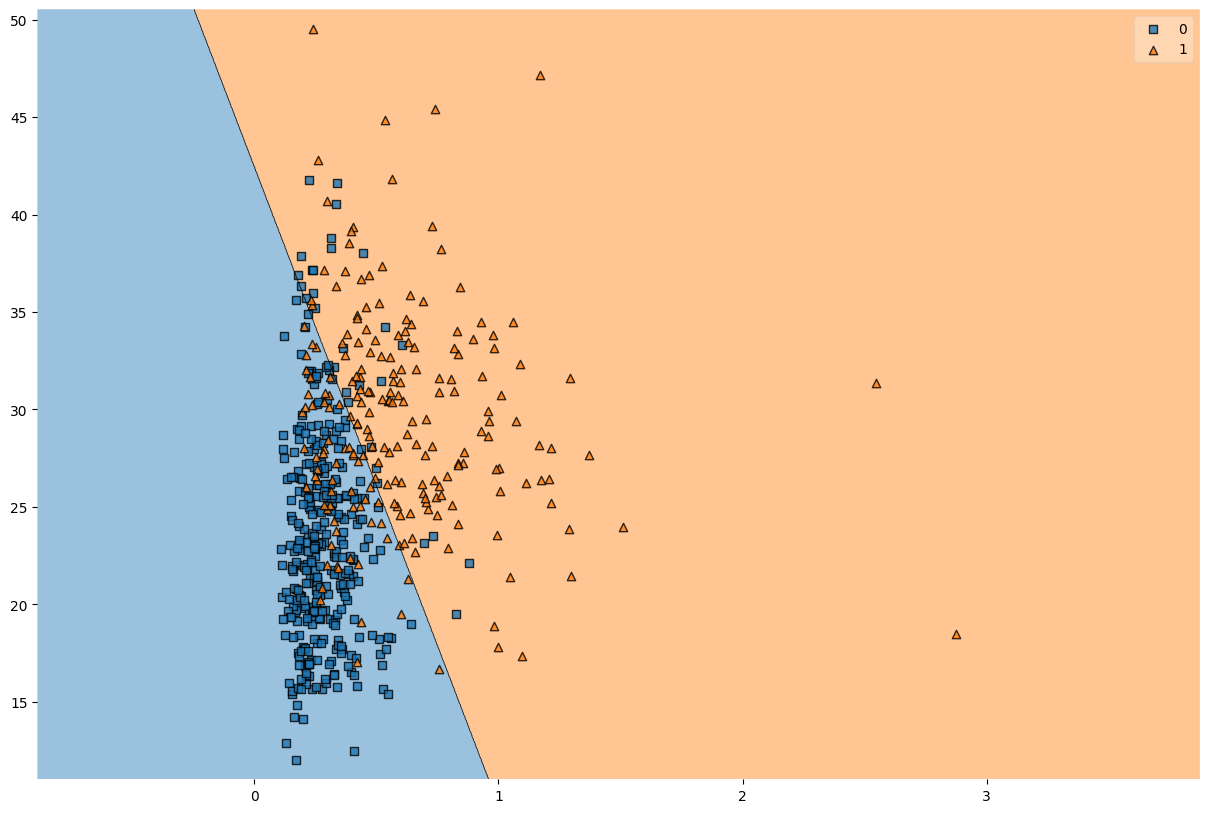

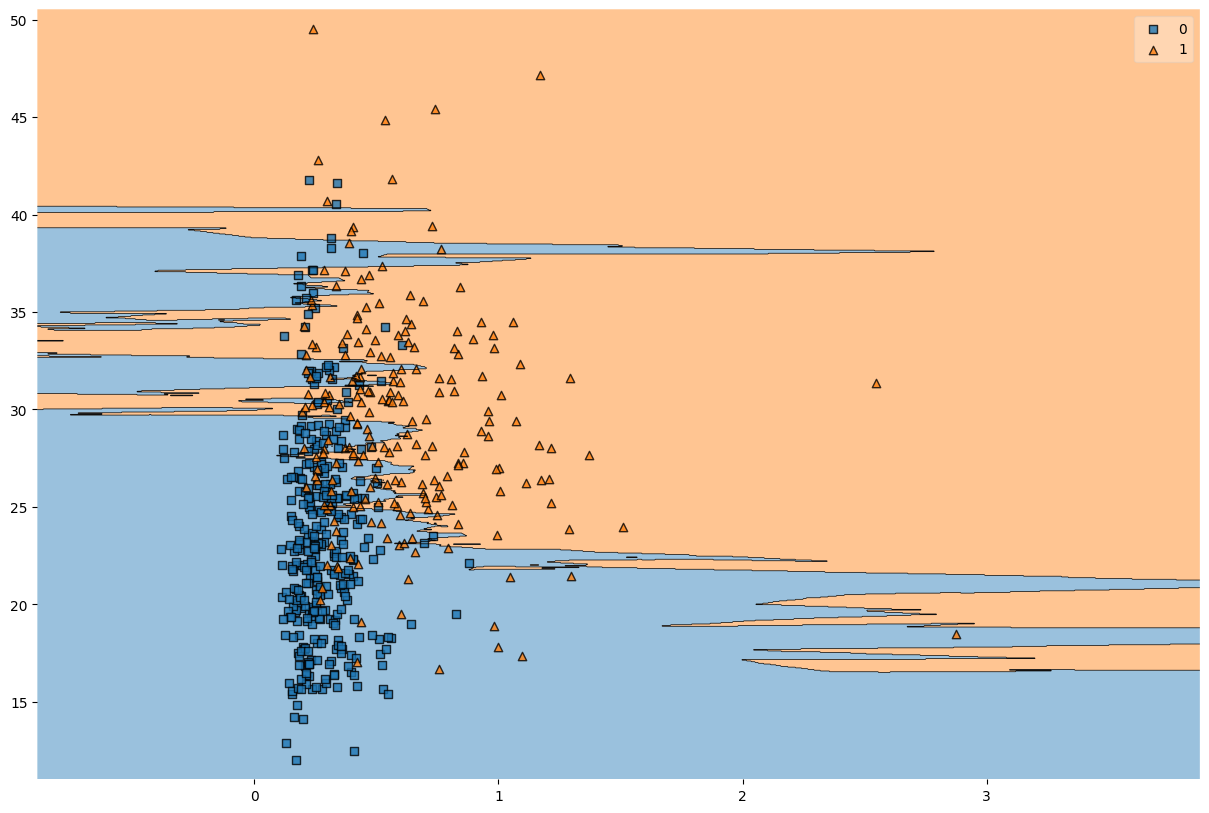

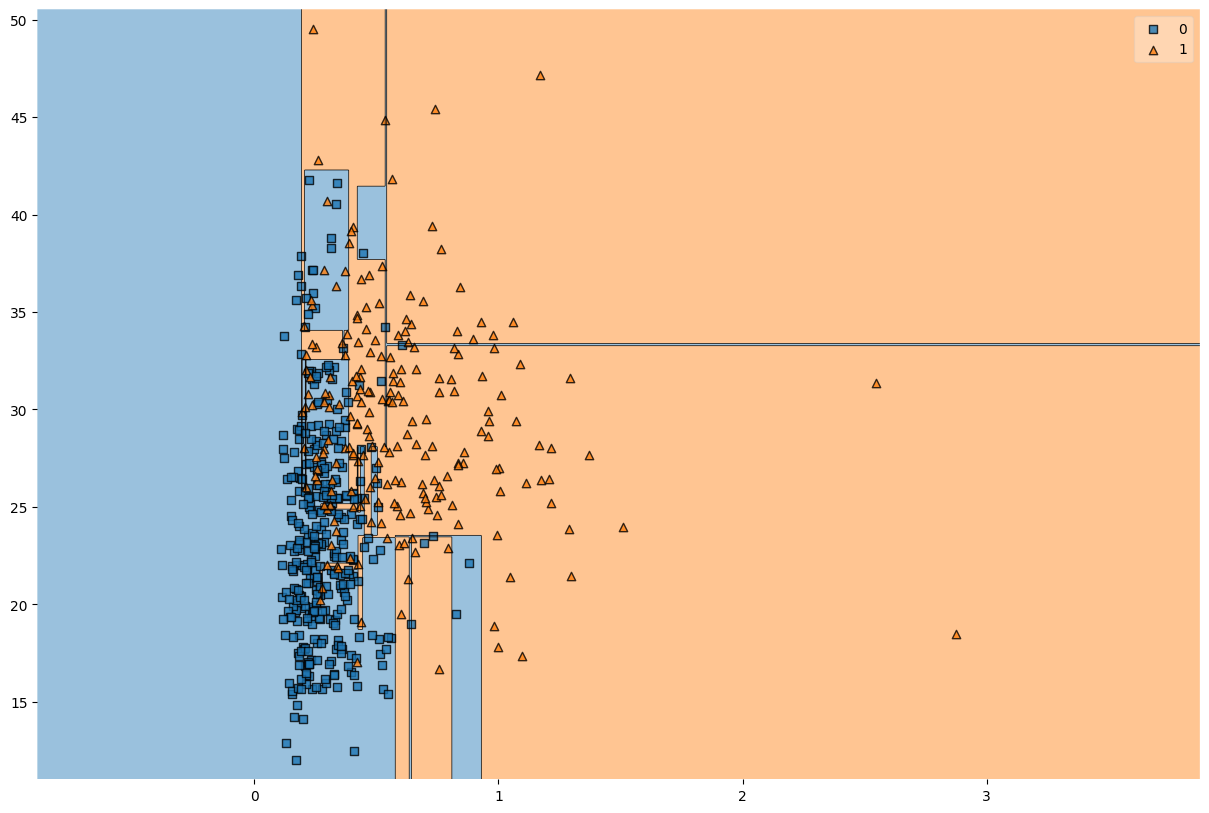

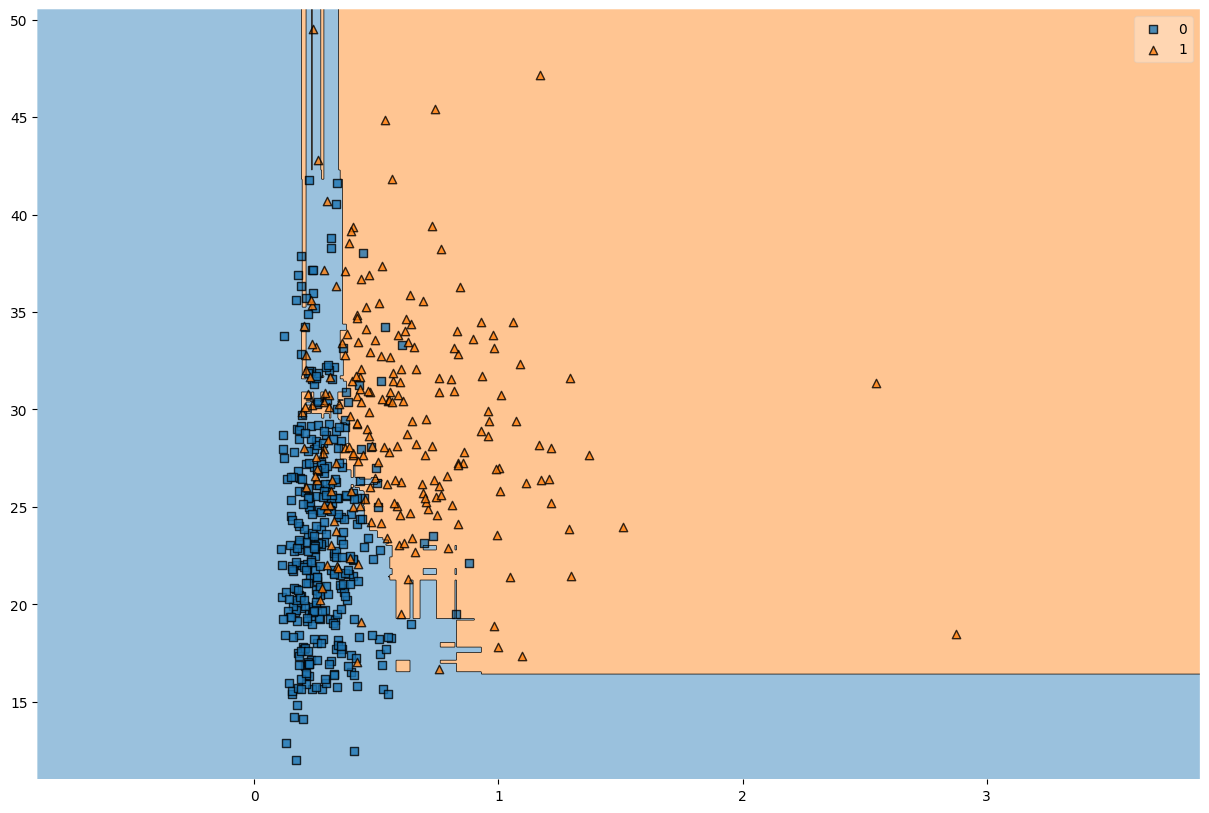

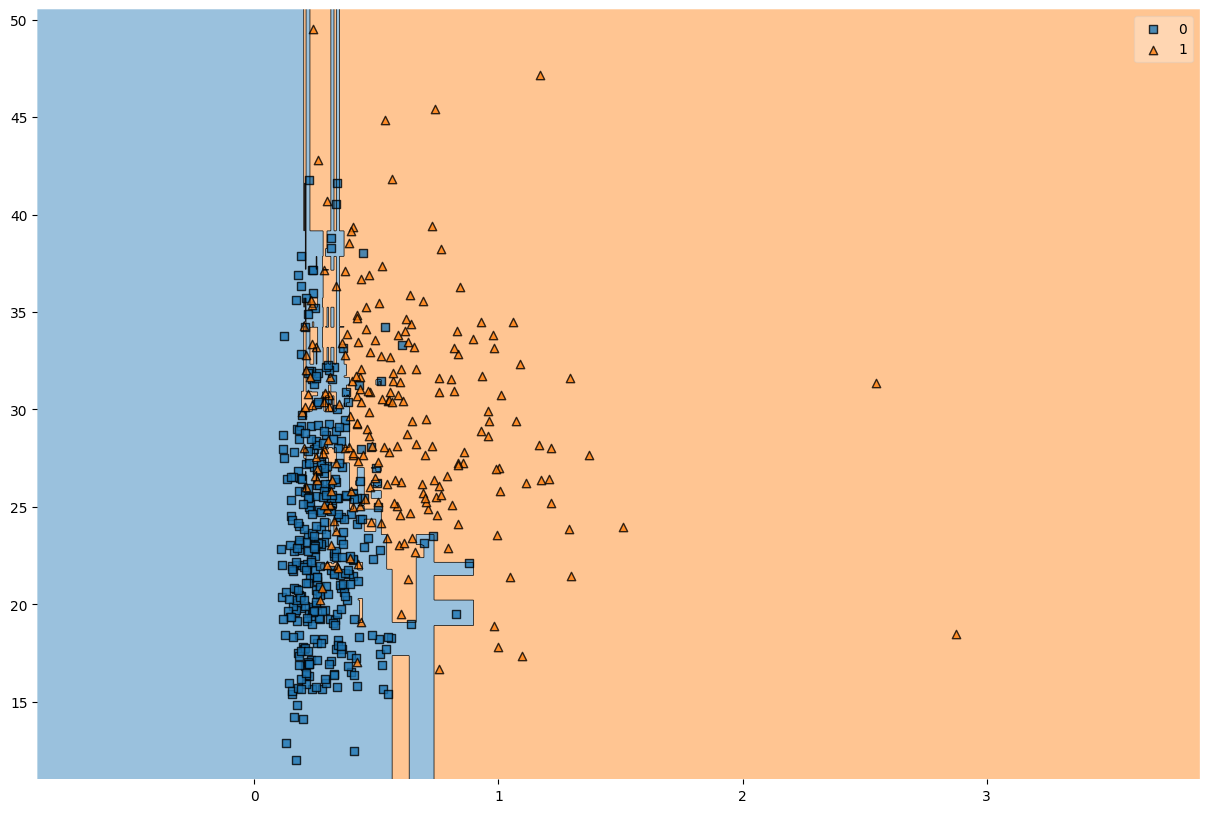

In [104]:
from mlxtend.plotting import plot_decision_regions
feat=imp['features'].iloc[:2]
X=df.loc[:,feat].values
Y=df.loc[:,'diagnosis'].values
def PDR(X,Y,model):
  mod=model
  mod.fit(X,Y)
  plt.figure(figsize=(15,10))
  plot_decision_regions(X,Y,mod)
for i in model:
  PDR(X,Y,i)

**RESULTS**

1)Logistic Regression model gives high auroc score compared with other model.It gives 0.975 score in auroc.

2)As per feature importance dataframe,radius_se,texture_worst, cancave_point_worst are the top three features which is affect the result.

3)And also below three features such as compactness_worst,cancavity_se,symmetry_se are affected lowly in the result.

4)dataset of breast_cancer is slightly imbalanced. But this Imbalnce is not affect the prediction of result.so,We can go with same dataset or balanced it.

5)As per plot decision region,linear decision boundary can split the datas with linear line.